# Dataset exploration - Simultaneous datasets

Collection of random plots for chapter 6.

In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import numpy as np
import scipy as sp
import scipy.stats as spst
import scipy.interpolate as spint
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.utils import io
import progress
import re
import inspect
import imp

from experimentlauncher import ExperimentLauncher
from dataio import DataIO

import load_experimental_data
import plots_experimental_data
import plots_paper_theo

import highdimensionnetwork
import hierarchicalrandomnetwork

import utils

from plots_fitexperiment_papertheo import PlotsFitExperimentAllTPaperTheo
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})

## Bays 09

In [22]:
data_bays = load_experimental_data.load_data(experiment_id='bays09', fit_mixture_model=True)
dataio = DataIO(label='bays09', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/dataset_exploration')

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/em_bays_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/collapsed_em_bays_new.pickle
=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/dataset_exploration/bays09-d1f1fbd8-42f9-4c5d-a92e-725b4d74615e ===


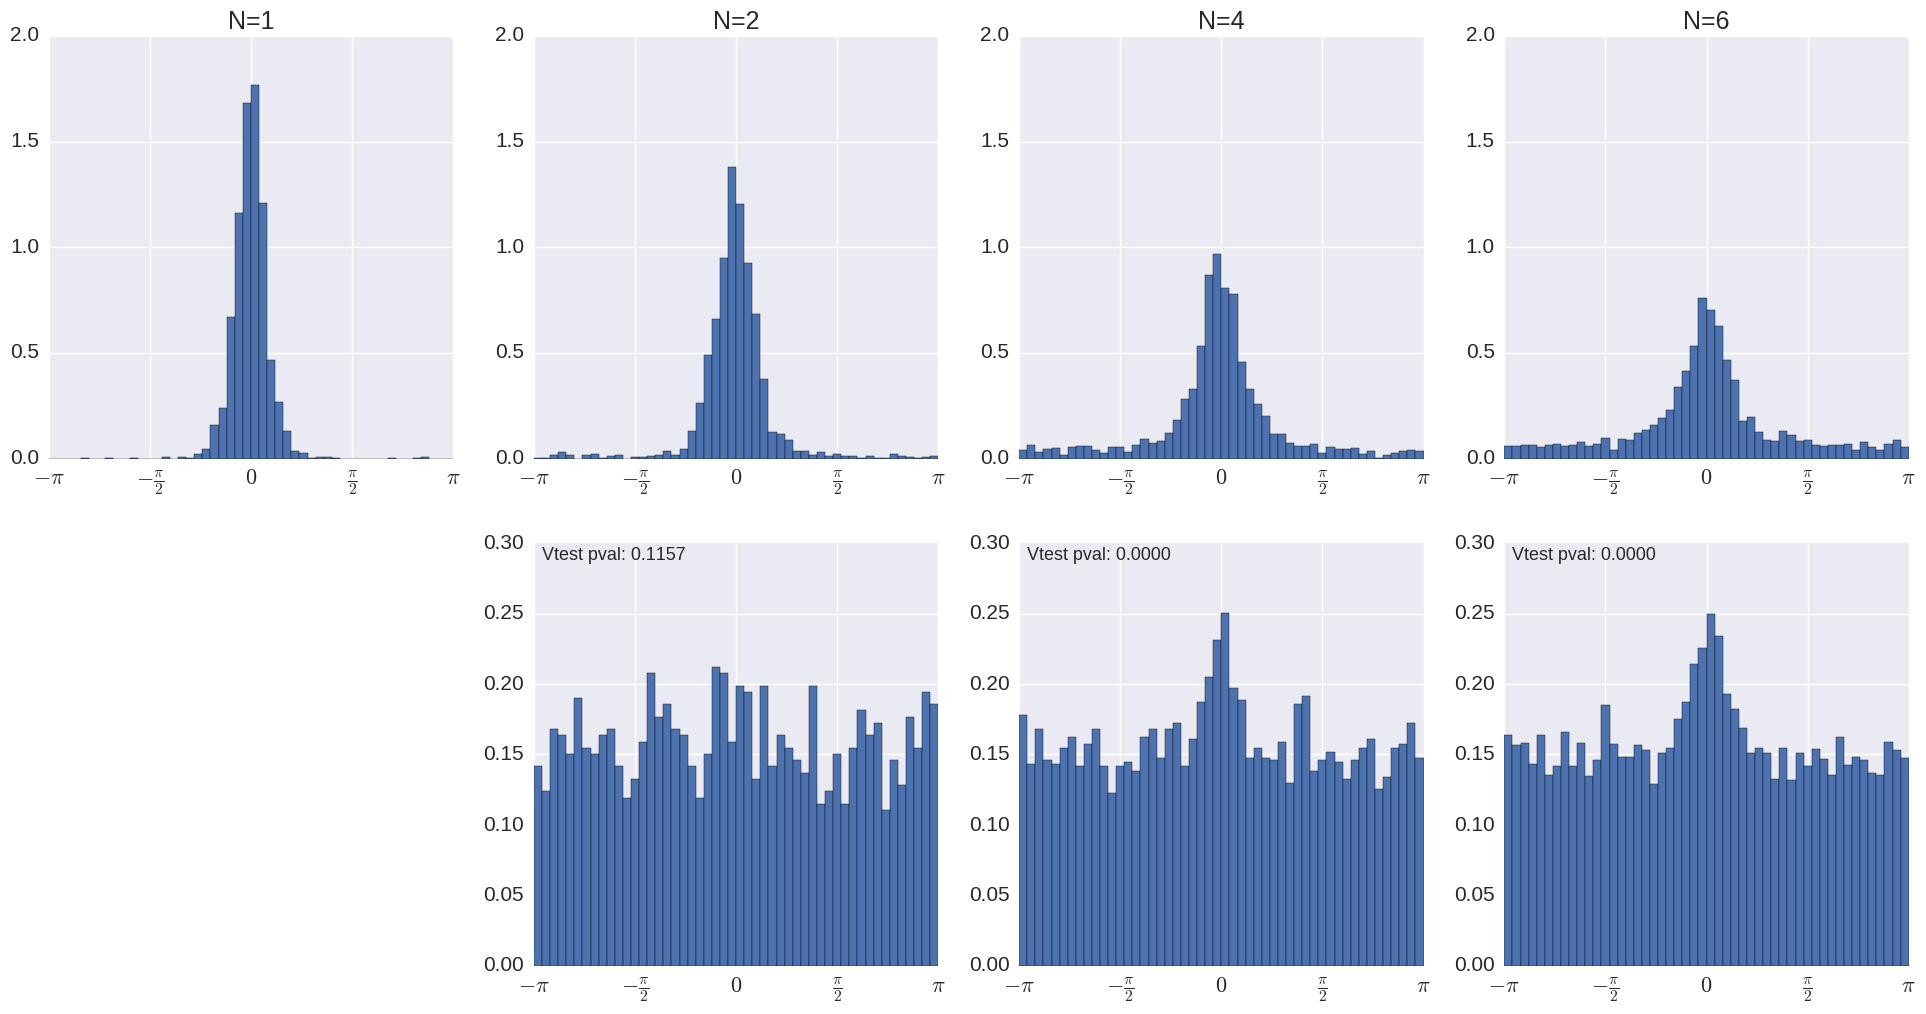

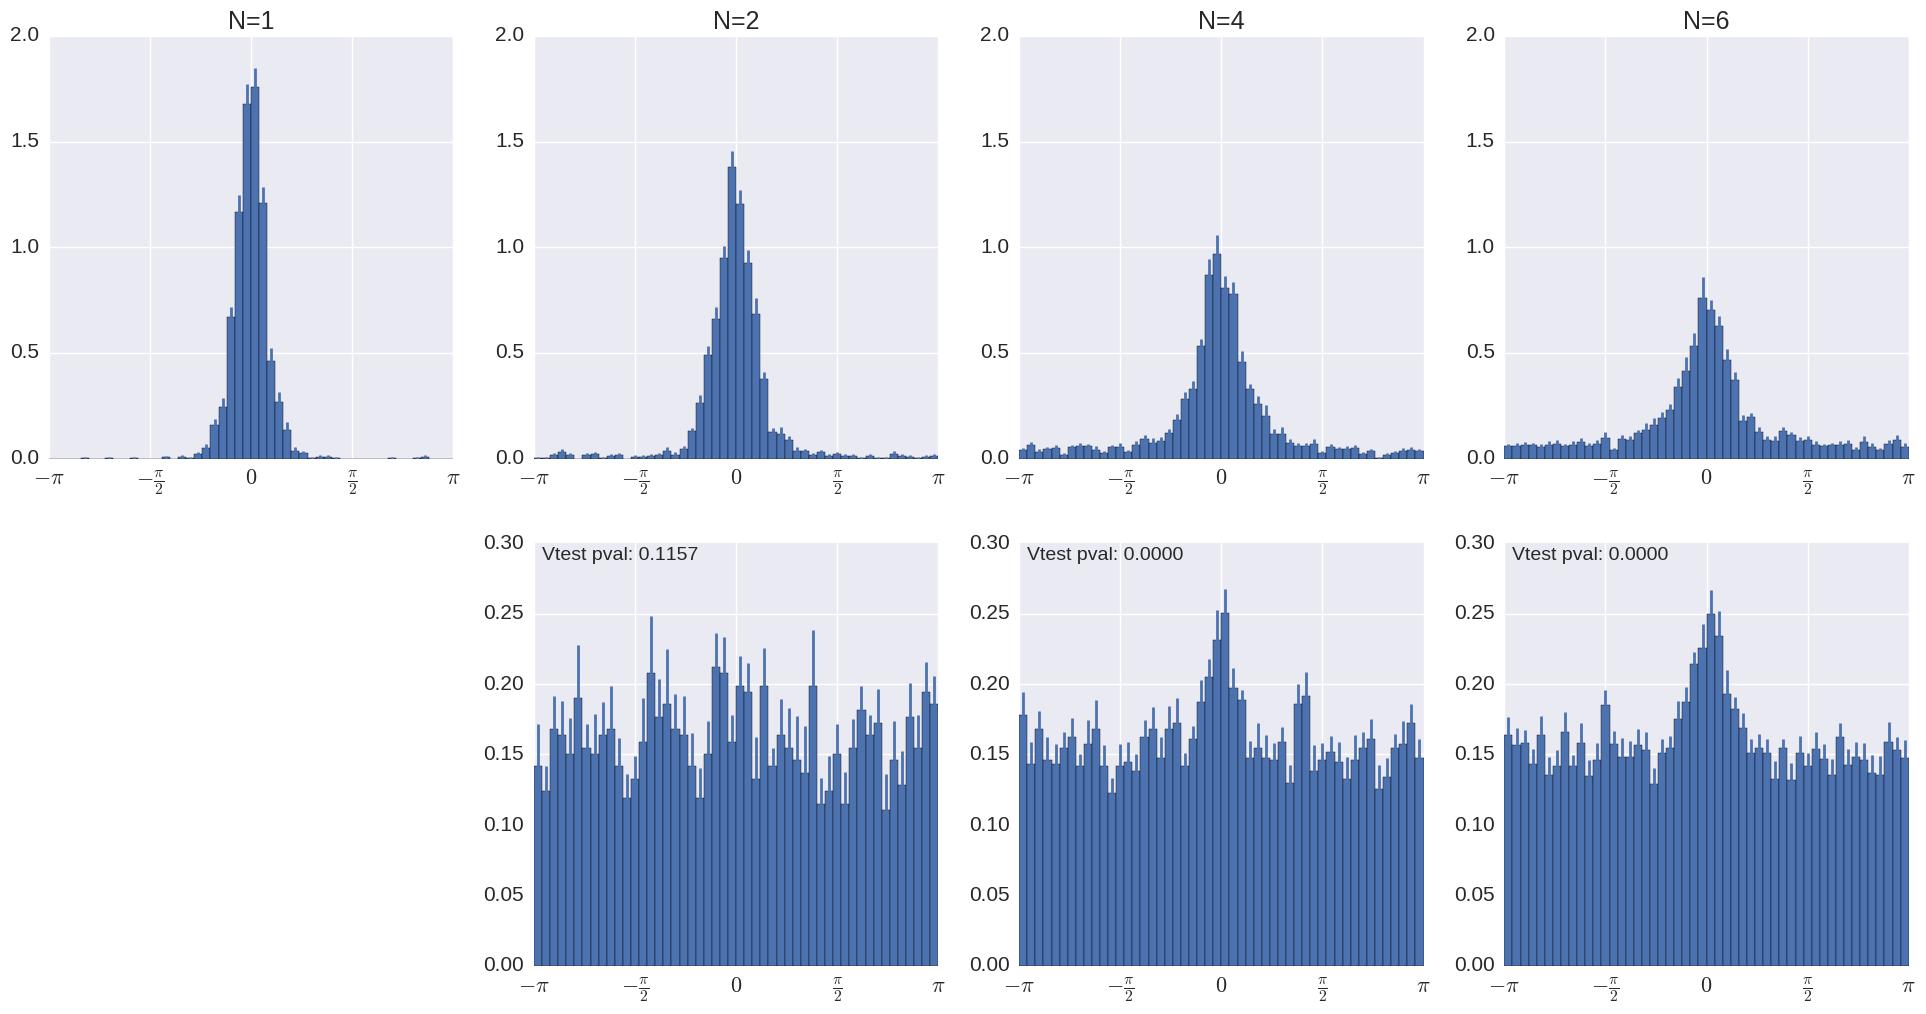

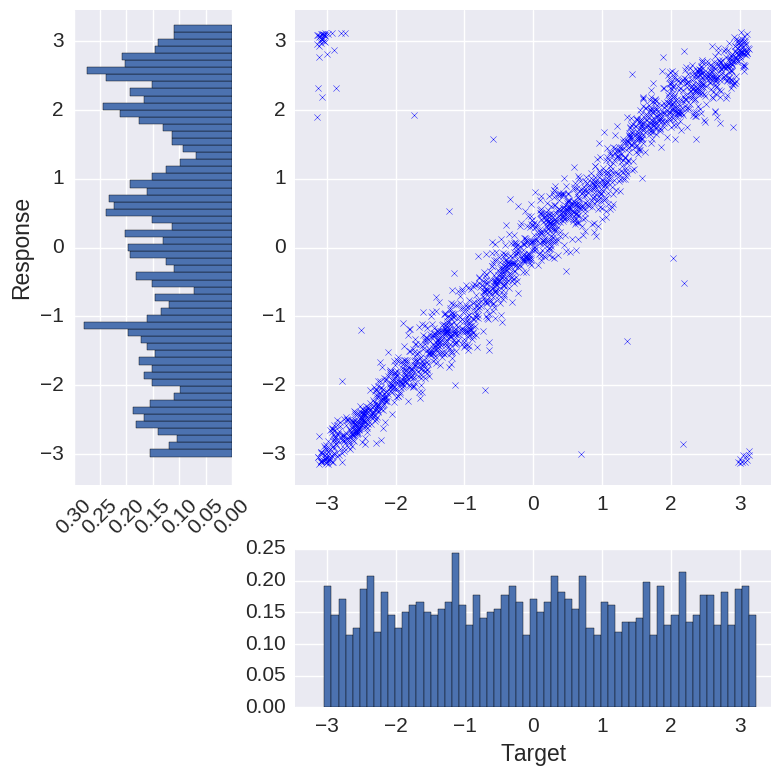

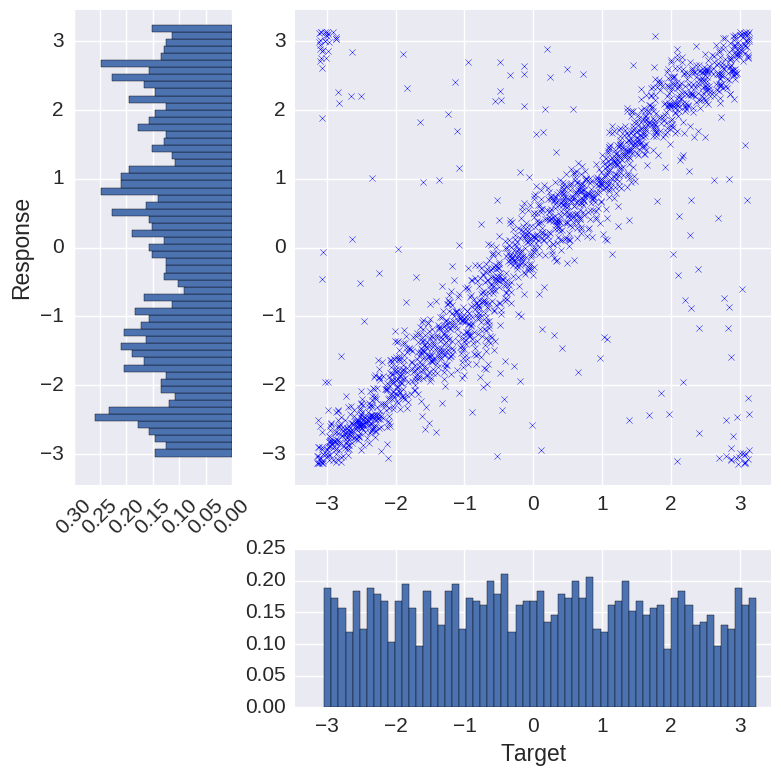

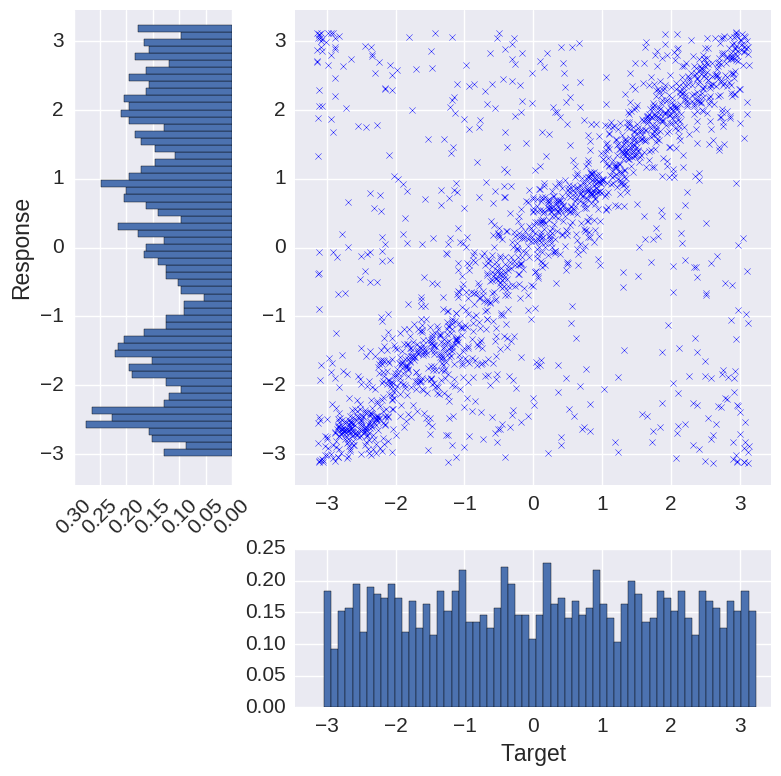

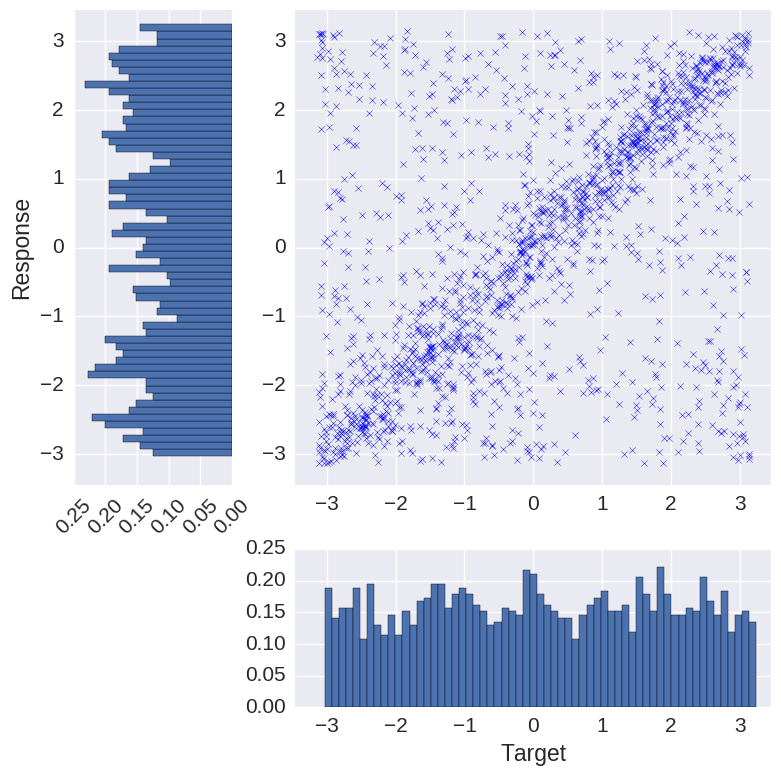

In [4]:
f1, f2, f3_all = plots_experimental_data.plots_histograms_errors_targets_nontargets_nitems(data_bays)

In [5]:
# Save everything
f1.savefig(dataio.create_formatted_filename("hist_err_all_{label}_{unique_id}.pdf"))
f2.savefig(dataio.create_formatted_filename("hist_err_subjects_{label}_{unique_id}.pdf"))

for f3_i, f3 in enumerate(f3_all):
    f3.savefig(dataio.create_formatted_filename("marginal_scatter_T%d_{label}_{unique_id}.pdf" % (f3_i + 1)))

In [6]:
# BIC, AIC and LL
bic_all = np.array([fit['bic'] for _, fit in data_bays['em_fits_nitems']['values'].iteritems()])
aic_all = np.array([fit['aic'] for _, fit in data_bays['em_fits_nitems']['values'].iteritems()])
ll_all = np.array([fit['train_LL'] for _, fit in data_bays['em_fits_nitems']['values'].iteritems()])

print "Bays09 BIC:", np.sum(bic_all)
print "Bays09 AIC:", np.sum(aic_all)
print "Bays09 LL:", np.sum(ll_all)

Bays09 BIC: 11605.8408889
Bays09 AIC: 11062.6680666
Bays09 LL: -5351.33403332


Collapsed summed BIC:  11568.5814533
Original non-collapsed BIC:  11605.8408889


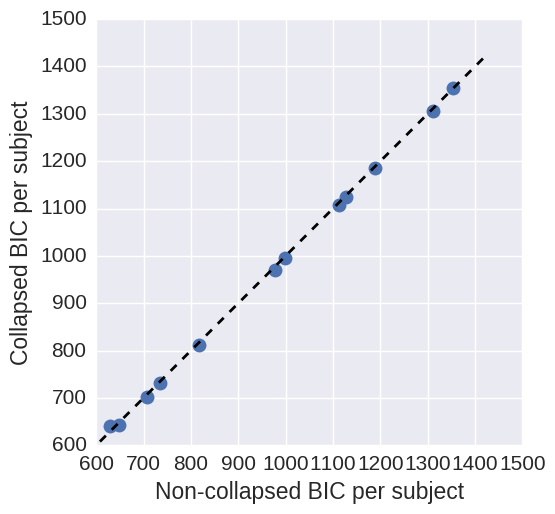

In [7]:
bic_sep, bic_coll = plots_experimental_data.plot_compare_bic_collapsed_mixture_model(data_bays)

## Gorgo 11

In [8]:
data_gorgo = load_experimental_data.load_data(experiment_id='gorgo11', fit_mixture_model=True)
dataio2 = DataIO(label='gorgo11', 
                calling_function='', 
                output_folder=os.environ['WORKDIR_DROP'] + '/Figures/thesis/dataset_exploration')

reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/em_gorgo_sim_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Gorgoraptis_2011/collapsed_em_gorgo_sim_new.pickle
=== FileIO ready: /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Figures/thesis/dataset_exploration/gorgo11-35e130e0-3b4a-4a68-b503-40b55f5732f9 ===


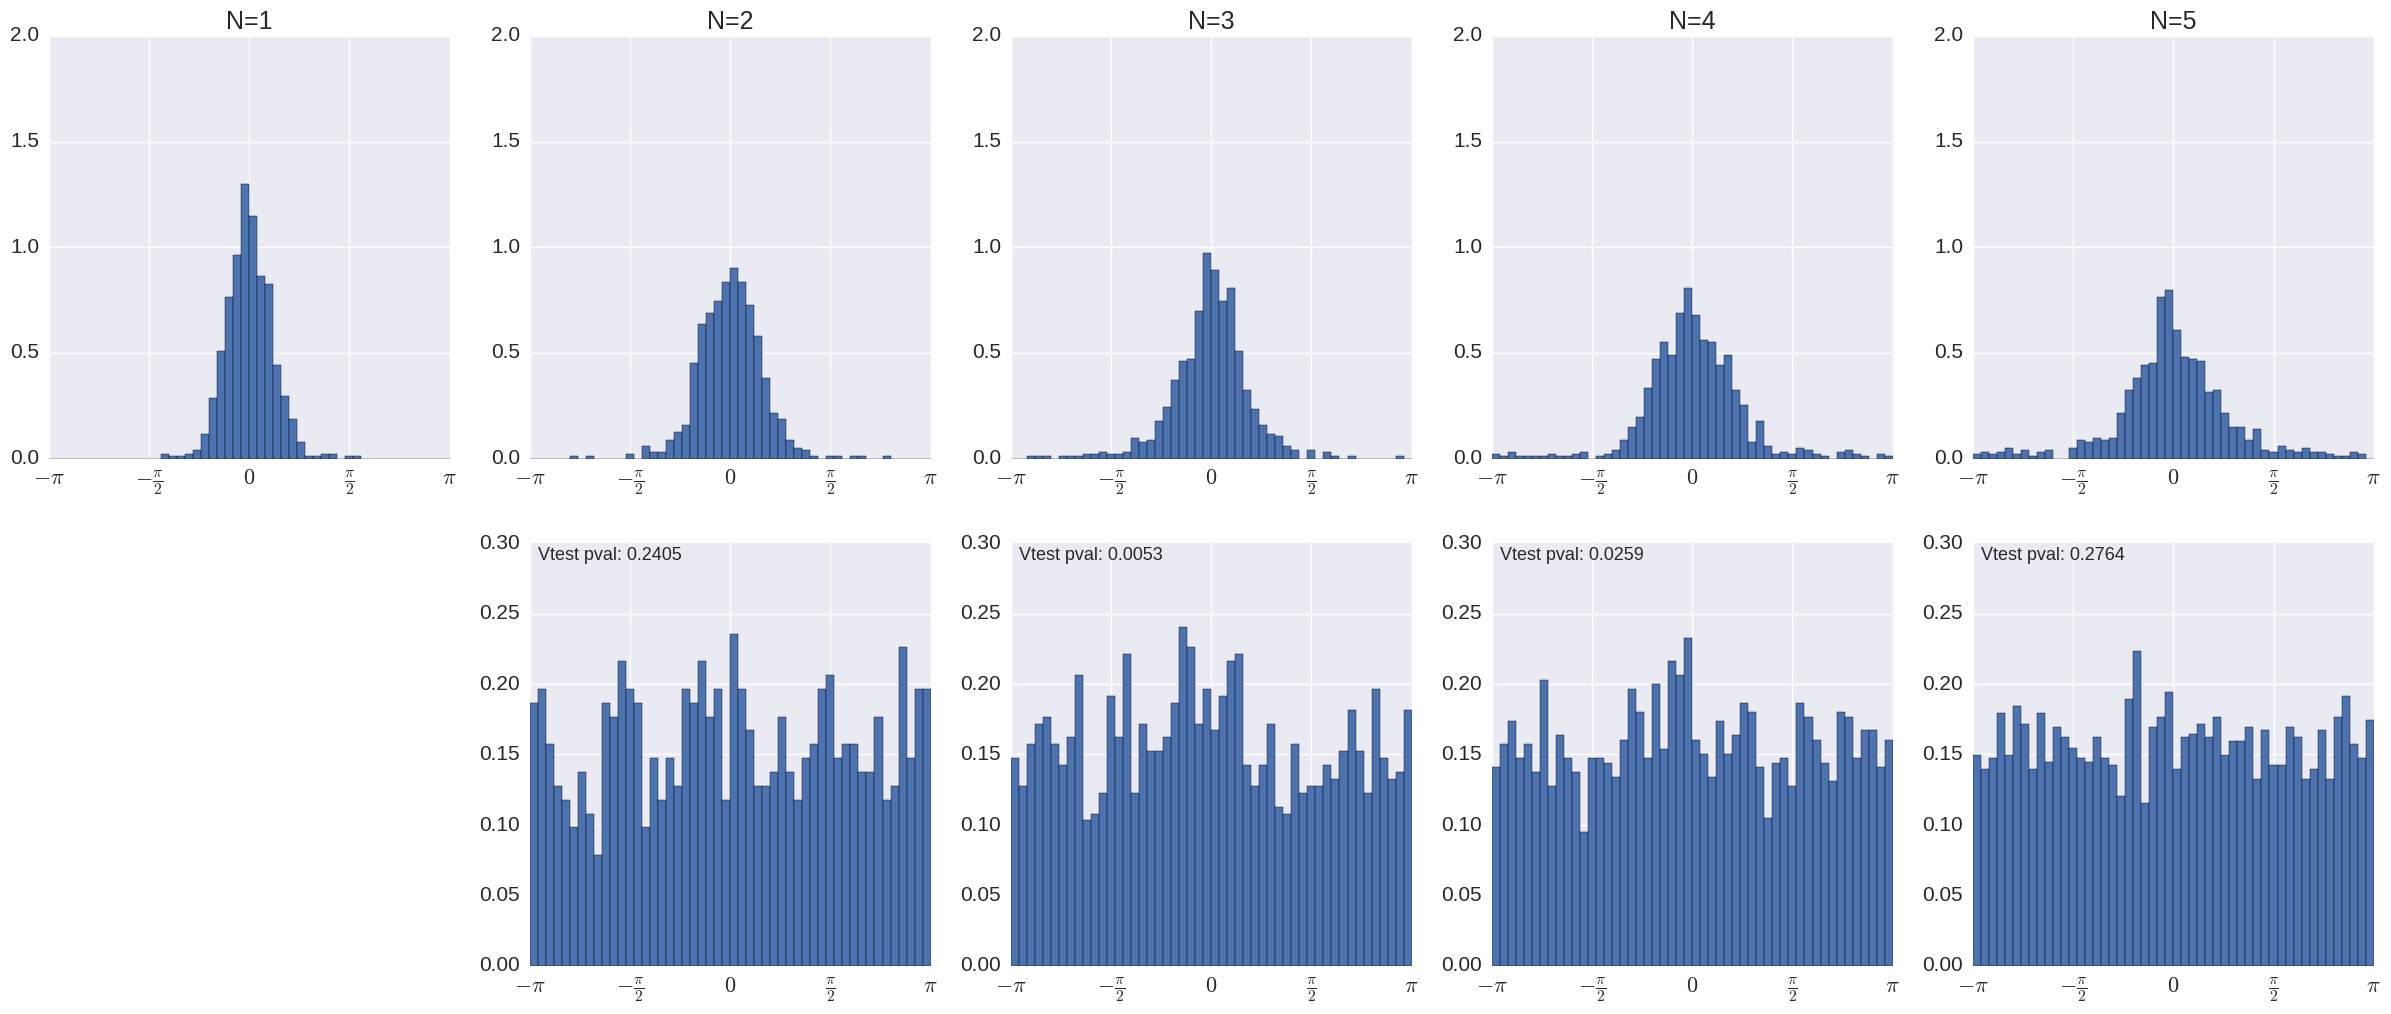

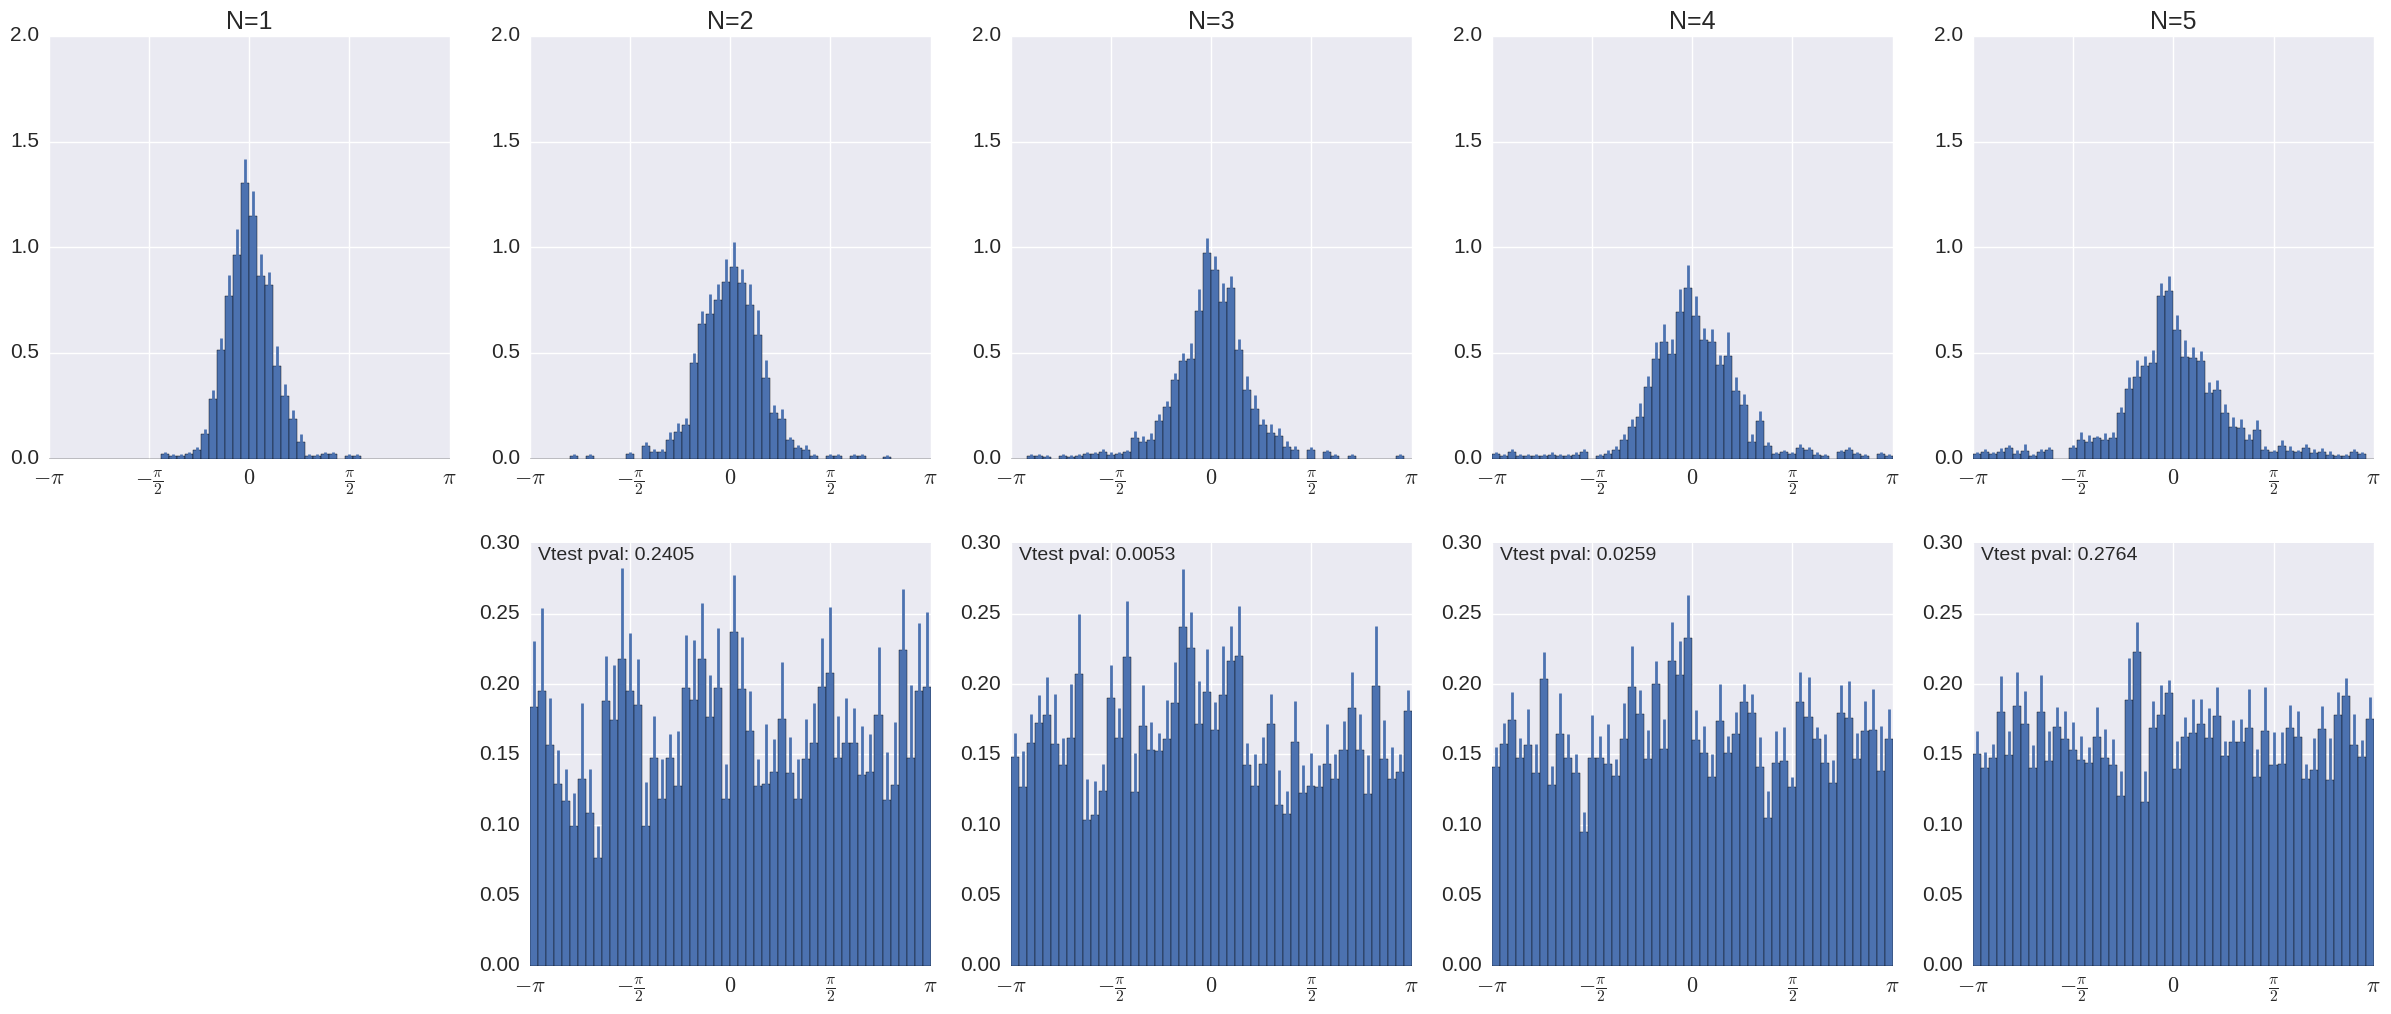

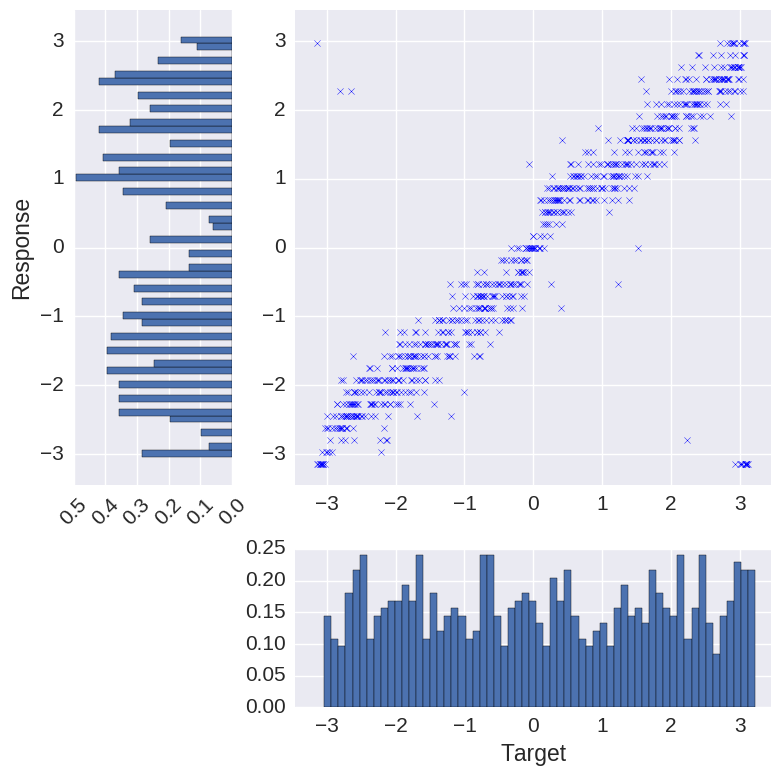

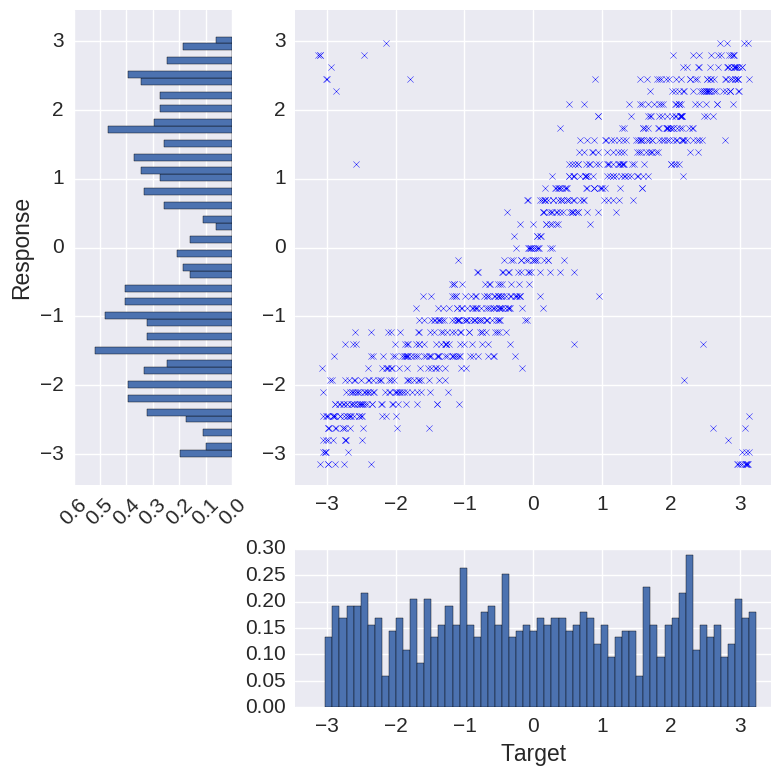

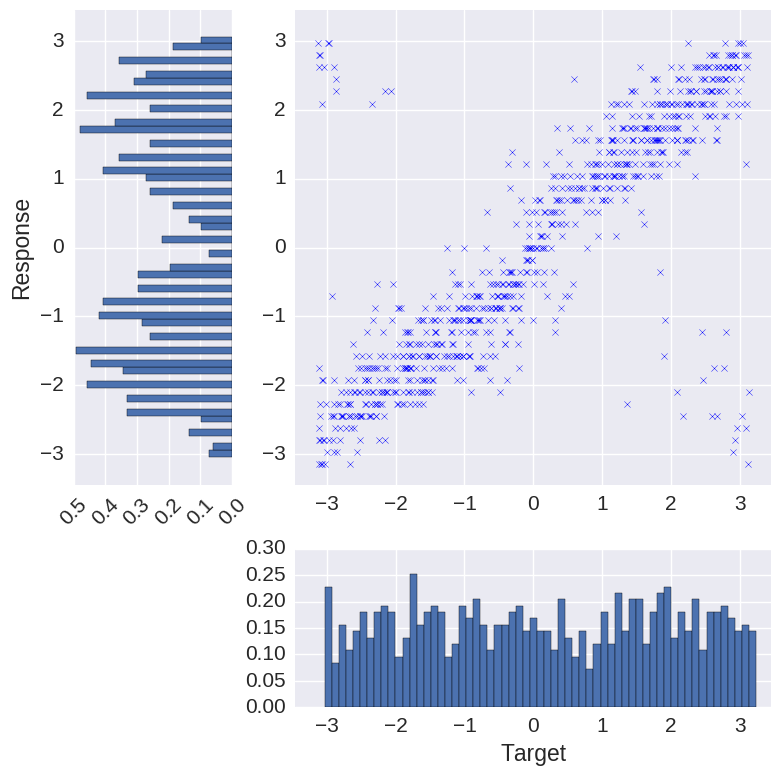

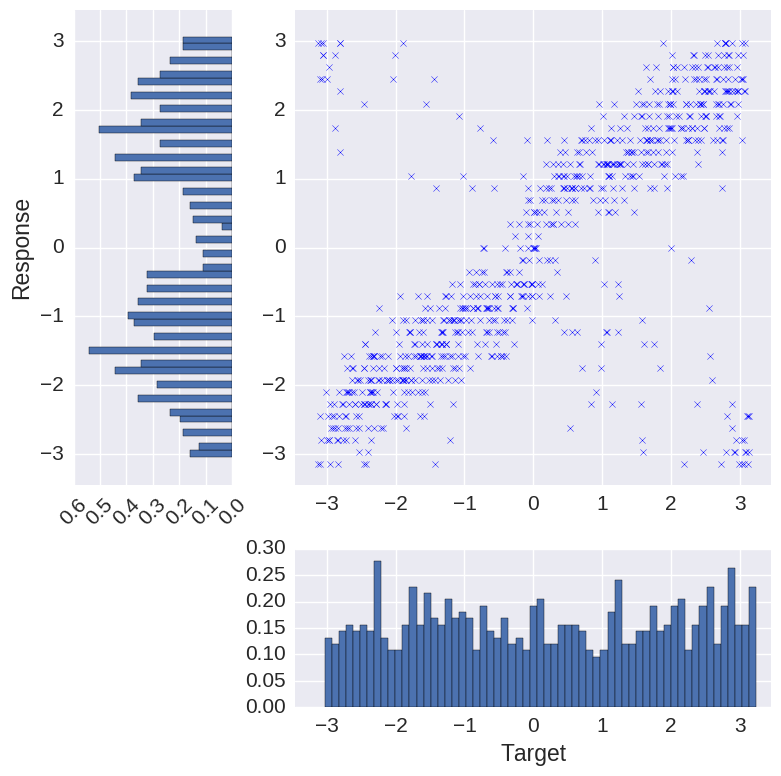

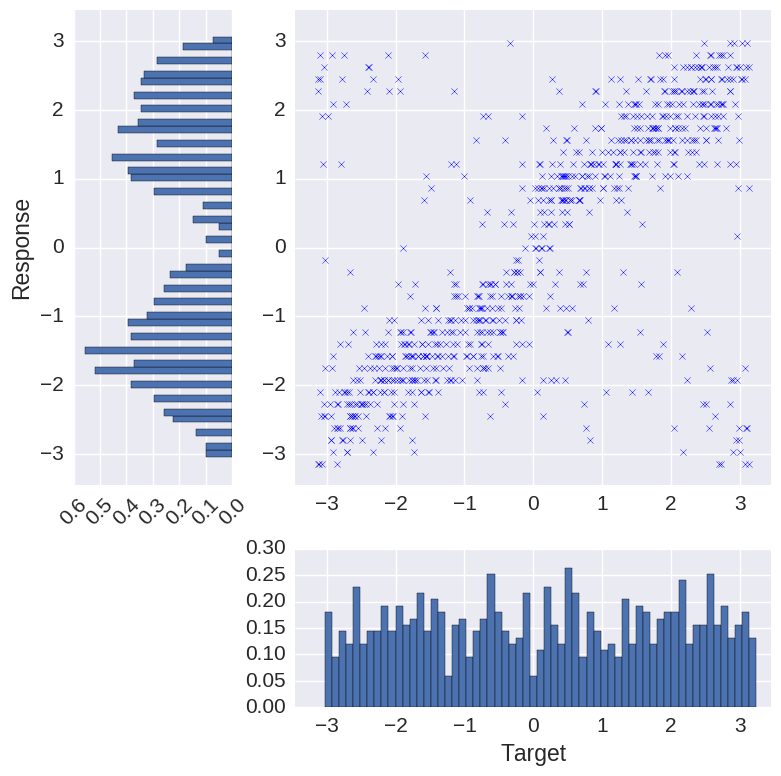

In [9]:
f1, f2, f3_all = plots_experimental_data.plots_histograms_errors_targets_nontargets_nitems(data_gorgo)

In [10]:
# Save everything
f1.savefig(dataio2.create_formatted_filename("hist_err_all_{label}_{unique_id}.pdf"))
f2.savefig(dataio2.create_formatted_filename("hist_err_subjects_{label}_{unique_id}.pdf"))

for f3_i, f3 in enumerate(f3_all):
    f3.savefig(dataio2.create_formatted_filename("marginal_scatter_T%d_{label}_{unique_id}.pdf" % (f3_i + 1)))

In [11]:
# BIC, AIC and LL
bic_all = np.array([fit['bic'] for _, fit in data_gorgo['em_fits_nitems']['values'].iteritems()])
aic_all = np.array([fit['aic'] for _, fit in data_gorgo['em_fits_nitems']['values'].iteritems()])
ll_all = np.array([fit['train_LL'] for _, fit in data_gorgo['em_fits_nitems']['values'].iteritems()])

print "Gorgo11 BIC:", np.sum(bic_all)
print "Gorgo11 AIC:", np.sum(aic_all)
print "Gorgo11 LL:", np.sum(ll_all)

Gorgo11 BIC: 7046.77073286
Gorgo11 AIC: 6648.97397117
Gorgo11 LL: -3172.48698559


Collapsed summed BIC:  6984.92699205
Original non-collapsed BIC:  7046.77073286


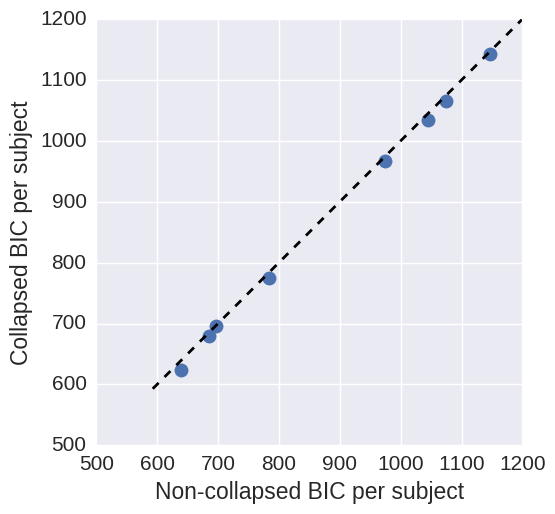

In [12]:
bic_sep, bic_coll = plots_experimental_data.plot_compare_bic_collapsed_mixture_model(data_gorgo)

=== FileIO ready: ./Data/plotpaper_bootstrap_randomized-plot_bootstrap_randomsamples-0d6b75ed-7565-4add-a19e-747ea6fdfe5f ===
reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/em_bays_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/collapsed_em_bays_new.pickle
reloaded bootstrap data from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/code/git-bayesian-visual-working-memory/Data/cache_bootstrap_randomsamples_papertheo/bootstrap_histo.npy


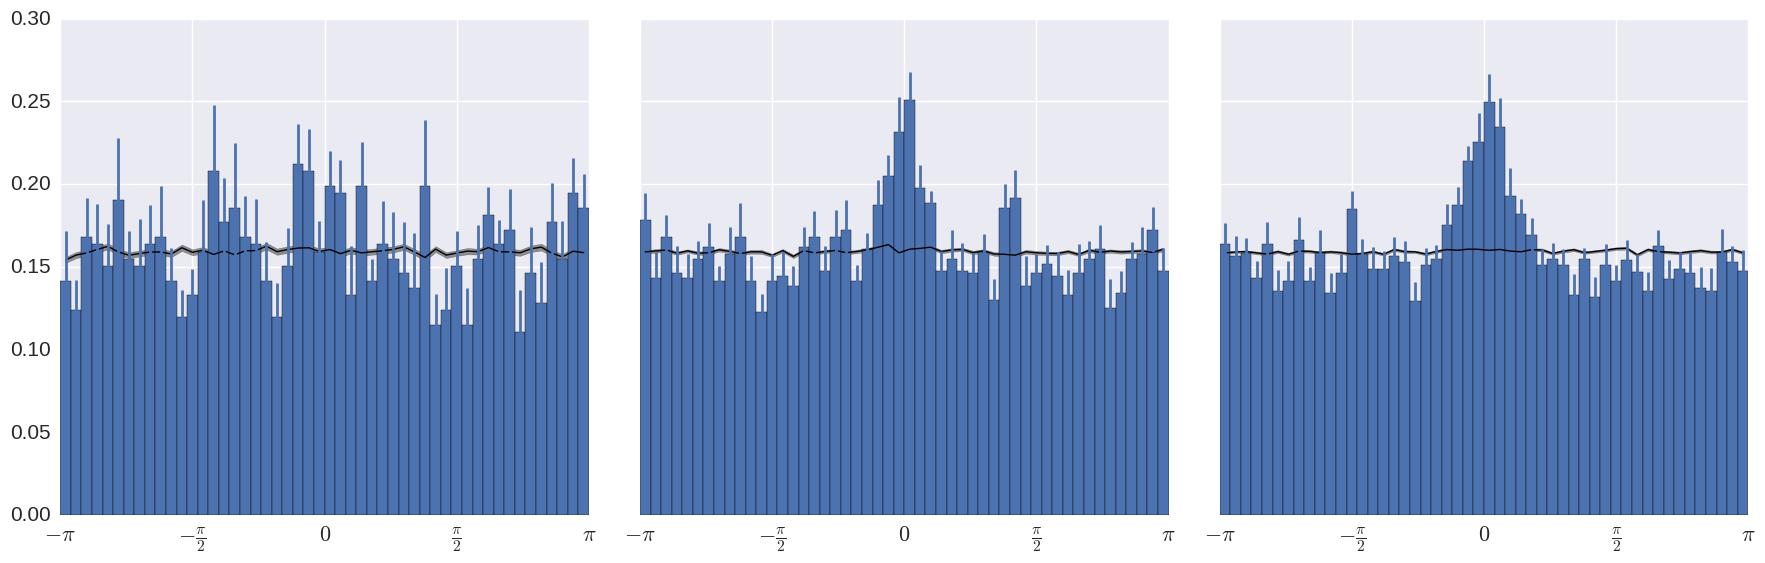

In [13]:
data = plots_paper_theo.plot_bootstrap_randomsamples()

## Bootstrap estimate

### Bays 09

In [14]:
%cd /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
%run reloader_bootstrap_experimental_bays09_060114.py

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
Reloader data generated from  generator_bootstrap_experimental_bays09_060114.py
Running  /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/reloader_bootstrap_experimental_bays09_060114.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_bootstrap_experimental_bays09_060114.py
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-00740af9-7064-49eb-976b-95565c4ee717.npy
0.00%, -- left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_e

num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-1c9c3965-35ff-43e4-81e4-556ab1dee9d3.npy
9.30%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-840f7a45-3364-42b3-8e6c-95dcd6f92d5c.npy
9.40%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-1d348cc5-bb5f-45db-b06f-ba480323a2f9.npy
9.50%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstr

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-2de2986f-0b28-4512-919f-e265af35053d.npy
18.80%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-2e1d5188-5633-402b-abc7-f5816198d270.npy
18.90%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-85e5b294-4d0d-4ead-b47b-1e427d3b7b21.npy
19.00%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-46add034-9cb9-4f8c-9d5c-c5be0d7c79a1.npy
27.90%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-46e54b2a-9d6b-43cb-b054-e8edaa2e4c1a.npy
28.00%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-46fc4953-81df-4f89-9a1c-6e1709dce2c0.npy
28.10%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-589ed9fd-f816-49bc-a932-5621ea8b3bf7.npy
36.50%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-8974c517-29c6-425b-a7a8-1cf23623f9d0.npy
36.60%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-58daae37-6fc4-45fd-8a2e-0c024ece100e.npy
36.70%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-6bee3fc7-5ce2-4e16-948b-41bf9318c671.npy
45.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-6bf31237-ea08-45a9-88eb-65ae63e39b0f.npy
45.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-6c736e14-47aa-43e9-a6c8-f9aa8521e49c.npy
45.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-8c37afae-89f6-4db4-ac83-67442ee4b98e.npy
54.20%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-7ded3243-6aaf-4d8f-b585-fae9122ba5dd.npy
54.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-7e698231-5ebc-4571-aa9d-13a67e5a42b7.npy
54.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-9be90cbc-2515-4454-b483-0e76cac0ad84.npy
63.70%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-9c0ad1f5-00ad-4294-bfce-17013bfb6729.npy
63.80%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-9c47ae14-2b36-44dd-ae66-09c005afc627.npy
63.90%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

73.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-b7850069-55ba-43dd-94a1-e0a8624393f0.npy
73.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-b7958b3d-4fa1-42de-9c48-246fe637ac04.npy
73.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-b7b4319f-189b-4218-ae24-b3c1d5277a3a.npy
73.60%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-cd6734f8-e41b-46aa-a36d-404328ae9429.npy
82.60%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-cdfa6a0d-50f1-4cdf-8dd4-eb7808951f88.npy
82.70%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-ce3f69ed-d54a-4cd0-8aca-620a9ed4c120.npy
82.80%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-e7c24a5c-3301-4317-b04d-e95ed16a2ef7.npy
92.40%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-e7e115ed-f3fa-4dee-911f-48141f5c7179.npy
92.50%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/bootstrap_experimental_bays09_bootstrapsamples1mult_060114-launcher_do_bootstrap_experimental-e8d27821-0a2b-4679-94ba-847a424bc813.npy
92.60%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_ba

Found new results_shape: (12, 4, 1000)
result_bootstrap_subject_nitems_samples dimensions: [1, 12, 4, 1000]
result_bootstrap_subject_nitems_samples flat dimensions: 1000 of (12, 4, 1000)
Order parameters:  ['num_repetitions']
=== FileIO ready: /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_bays09_bootstrapsamples1mult_060114/outputs/global_plots_boostrap-plots_boostrap-a62d8893-3ed7-4b79-9ffc-ef67ae746c35 ===
reloaded mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/em_bays_basicmodel.pickle
reloaded collapsed mixture model from cache /nfs/nhome/live/lmatthey/Dropbox/UCL/1-phd/Work/Visual_working_memory/experimental_data/Bays2009/collapsed_em_bays_new.pickle
Nitems 2, all subjects
p_val: [ nan   0.  nan  nan]
Nitems 2, subject 1
p_val: 0.103
Nitems 2, subject 2
p_val: 0.001
Nitems 2, subject 3
p_val: 0.042
Nitems 2, subject 4
p_val: 0.036
Nitems 2, subject 5
p_val: 0.061
Nitems 

In [15]:
print("P-values, Collapsing across subjects")
print(result_pvalue_bootstrap_nitems)

print("P-values, per subjects")
print(result_pvalue_bootstrap_subject_nitems_samples)

P-values, Collapsing across subjects
[ nan   0.   0.   0.]
P-values, per subjects
[[   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
     nan    nan]
 [ 0.103  0.001  0.042  0.036  0.061  0.001  0.661  0.034  0.153  0.001
   0.005  0.049]
 [ 0.927  0.062  0.134  0.     0.002  0.     0.629  0.315  0.071  0.021  0.
   0.   ]
 [ 0.961  0.     0.013  0.     0.     0.     0.     0.     0.162  0.     0.001
   0.001]]


In [16]:
print("num significant subjects, collapsing across subjects")
print(result_pvalue_bootstrap_nitems < 0.01)

print("num significant subjects, per subjects")
print(np.sum(result_pvalue_bootstrap_subject_nitems_samples < 0.01, axis=-1))

num significant subjects, collapsing across subjects
[False  True  True  True]
num significant subjects, per subjects
[0 4 5 9]


### Gorgo 11

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
Reloader data generated from  generator_bootstrap_experimental_gorgo11_200717.py
Running  /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/reloader_bootstrap_experimental_gorgo11_200717.py
Arguments: []

        Reload outputs run with the automatic parameter generator for PBS

        Should handle random sampling of the parameter space.
    
Reloader data generated from  generator_bootstrap_experimental_gorgo11_200717.py
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-f958f390-8738-473b-b6dd-adb60c7b5d7b.npy
0.00%, -- left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_boot

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-57440a28-7d49-49b7-a6ac-f17b559189d3.npy
4.50%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-3cd95306-583d-4709-8241-07b4e37ab19d.npy
4.60%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b50e4a25-8864-423a-93e3-55985fdbaee3.npy
4.70%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-78f57b8f-fe37-4c6f-ac0e-63a682a2c803.npy
8.20%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-3dd0d4ef-ccad-40e9-91d3-bc7ef6772a00.npy
8.30%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-e7a20f4f-d601-476d-a5ae-a5db23c394e8.npy
8.40%, 3s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-8988040e-e6e6-4713-b0f5-602b620124d2.npy
11.70%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-a997e812-d781-4de9-ba33-e7bac446d5e0.npy
11.80%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-72326a2a-2556-46cc-8c7a-4e2f5b8e7b16.npy
11.90%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-60dc074d-60bf-4873-9594-8bb820f92d8c.npy
15.40%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-73994da8-b37e-4778-86d7-fbee411c1732.npy
15.50%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-df0ba156-73b8-4d85-ad19-6ec1c7f0888d.npy
15.60%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontarget

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-831d7c85-f037-4d4c-a03c-a2b5930b7c06.npy
19.10%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0058157b-0d03-4c02-b5e7-ebd3522c23ca.npy
19.20%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-d561da54-d51c-4a23-930a-3402a5b2975e.npy
19.30%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-66839e2b-a8f5-439f-a9d7-7083bad4647f.npy
24.60%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-272a5a70-1431-47d2-9048-bffbf3fe9249.npy
24.70%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-8d22b874-d145-4fe4-80e1-7002dfb2e852.npy
24.80%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-7c708653-26fe-4c92-b16a-645b15b396cf.npy
28.40%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-33b51cb2-441d-46a1-acc3-110a1abafdae.npy
28.50%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-f1e664cf-ae08-4f14-9101-2939b0bbfdfa.npy
28.60%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

31.80%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-cbf57600-471a-4e34-b1eb-51c1896b0c77.npy
31.90%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-50a48293-869e-4b7d-8cca-b411269fc9a3.npy
32.00%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-1b813534-23a9-4e3b-86c5-8e27e26d3fa5.npy
32.10%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_w

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-26a20844-c89d-4b87-913f-3e076ea6a6e3.npy
35.50%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-f028e56f-b271-45df-8446-e9ed1593a5de.npy
35.60%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0b0f299b-2f4f-485c-b2a5-74c9f0d52a0b.npy
35.70%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-1bb86615-018a-417d-a119-b8a5f91a45ed.npy
39.00%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-41cecd57-8936-4d92-969b-c8215aba4b4f.npy
39.10%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-05d5eb8c-27e8-41fb-affb-7130673d11ed.npy
39.20%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-40470744-8c8d-4d09-b642-5e871e94639e.npy
42.80%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-7afd71bb-c3b2-43c0-99e8-c553f6949385.npy
42.90%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-45031edd-385a-4c18-814c-9b633d06cea5.npy
43.00%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0b98ffa0-457c-4d27-8d8f-9a646b0026bb.npy
46.20%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0424eb2f-0d6d-44ca-a672-255e2731b046.npy
46.30%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-c99a9491-9bc6-46e5-9b73-ac7b743c7bc4.npy
46.40%, 2s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-43b1b6ac-f35e-4b79-b0e3-791f0704e003.npy
50.00%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-bf35fca7-85e9-4d23-b614-7dc6452b3d74.npy
50.10%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0bb93a67-4ba1-40d9-a230-c30194637a70.npy
50.20%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

53.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-e2e3ddd1-546c-46b2-bebc-af7d864f8b2b.npy
53.60%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-845e0c6a-22c2-4e05-a6b4-e9bc53e4d854.npy
53.70%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-78399907-4b36-476e-9836-b4699d2fa8e8.npy
53.80%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_w

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-7b4d0703-35ff-4713-94c1-6688beec1a10.npy
56.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-adb5ef4d-47da-4427-bd0c-0e693f292325.npy
56.60%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-ffbe5e53-dea5-4633-bd2a-58e524b74e9f.npy
56.70%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-e80ccc54-2037-4140-87f1-bc40bcd8d05f.npy
59.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-ce70ef1a-509e-4147-8fd1-64558728195c.npy
59.60%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b729aa91-4e90-45aa-8ba6-a471faf7b99a.npy
59.70%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-8c4450f4-21a9-4214-a6ad-60c2a611f05b.npy
63.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-1ea33dbc-5cb2-4f23-bceb-1d735c0a718e.npy
63.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-f35548b2-0ec2-4191-8b97-8257e4c69318.npy
63.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-120aed64-3d56-4263-b8a7-7ab7a657c22f.npy
66.90%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-920ad71f-9cf6-43f8-8341-f3a61ec58c15.npy
67.00%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b1e51b2e-584e-4c10-a9e3-ace02175ee27.npy
67.10%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-e07801c8-c3d1-4e1a-8c83-f35f4ad857d6.npy
70.80%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-42ff3b16-ea14-497f-bb75-83b9763dd44b.npy
70.90%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-eab52610-93d0-4b92-af61-5bb9c682d114.npy
71.00%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-8cb285cf-f4c5-4366-8cbe-910d68e13dca.npy
74.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-7f8f7077-7eb1-45bc-8410-70fc9011b5d3.npy
74.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-79fdd373-e2e3-48b3-9ae9-10516d5bc8c2.npy
74.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-fff41da3-aa5c-4ffa-bbc0-923fd6bda75b.npy
77.80%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-841c52fc-45e1-40b7-a3f3-ea5f42a12747.npy
77.90%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b991c0c9-b9c8-4e36-86bb-928ce3462744.npy
78.00%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-02ad31a6-e5ec-4f8a-8948-429c62533132.npy
81.30%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-ce7e42a5-20a1-48e8-aae2-d8e4e264b84c.npy
81.40%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-bc2418d8-5e59-4d54-a32b-3502db4c0485.npy
81.50%, 1s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-f3f50b9b-2f31-40f5-b6e2-11b32d8f230c.npy
85.00%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-c389aae4-6156-491a-9c01-9f0b61ca13c0.npy
85.10%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b4d3237e-9e7a-4c2c-8877-17575068b880.npy
85.20%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontarget

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-d35d1ea8-39b6-4474-a720-5e080651c265.npy
88.60%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-07b7709c-4286-4990-95c0-19dc6b9d56a3.npy
88.70%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-0f4586cd-f0b0-4e1a-8bd6-2671158de3b2.npy
88.80%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b12521d4-7015-4bbd-8f4f-4ffcb39b0703.npy
92.20%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-beaf06ef-0d75-4c59-9a4d-7b18fb7e0676.npy
92.30%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-65bd7260-5096-4368-9356-1daeb26e8f53.npy
92.40%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

95.80%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-b1d4b74b-a373-4802-ac84-29f8bc58e39c.npy
95.90%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-fc4d119d-5a2d-44af-864d-902eb04965dc.npy
96.00%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-4159621f-3cca-4899-9343-f6ff82c07d77.npy
96.10%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_w

/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-37f3e705-c27b-4c49-a71b-2cad64a90259.npy
99.60%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-442c0203-9e88-43ef-8f93-9bc6a026c368.npy
99.70%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717/bootstrap_experimental_gorgo11_bootstrapsamples1mult_200717-launcher_do_bootstrap_experimental-016ef2f2-11a6-4cd1-a396-ba7ba1c02f13.npy
99.80%, 0s left - 08.08 18:05
num_repetitions 1.00
/nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets/bootstrap_experimen

/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Nitems 2, all subjects
p_val: [   nan  0.858    nan    nan    nan]
Nitems 2, subject 1
p_val: 0.672
Nitems 2, subject 2
p_val: 0.358
Nitems 2, subject 3
p_val: 0.845
Nitems 2, subject 4
p_val: 0.209
Nitems 2, subject 5
p_val: 0.304
Nitems 2, subject 6
p_val: 0.86
Nitems 2, subject 7
p_val: 0.918
Nitems 2, subject 8
p_val: 0.072
Nitems 3, all subjects
p_val: [   nan  0.858  0.067    nan    nan]
Nitems 3, subject 1
p_val: 0.938
Nitems 3, subject 2
p_val: 0.66
Nitems 3, subject 3
p_val: 0.356
Nitems 3, subject 4
p_val: 0.015
Nitems 3, subject 5
p_val: 0.088
Nitems 3, subject 6
p_val: 0.054
Nitems 3, subject 7
p_val: 0.939
Nitems 3, subject 8
p_val: 0.381
Nitems 4, all subjects
p_val: [   nan  0.858  0.067  0.003    nan]
Nitems 4, subject 1
p_val: 0.89
Nitems 4, subject 2
p_val: 0.61
Nitems 4, subject 3
p_val: 0.877
Nitems 4, subject 4
p_val: 0.001
Nitems 4, subject 5
p_val: 0.004
Nitems 4, subject 6
p_val: 0.127
Nitems 4, subject 7
p_val: 0.187
Nitems 4, subject 8
p_val: 0.423
Nitems 5, a

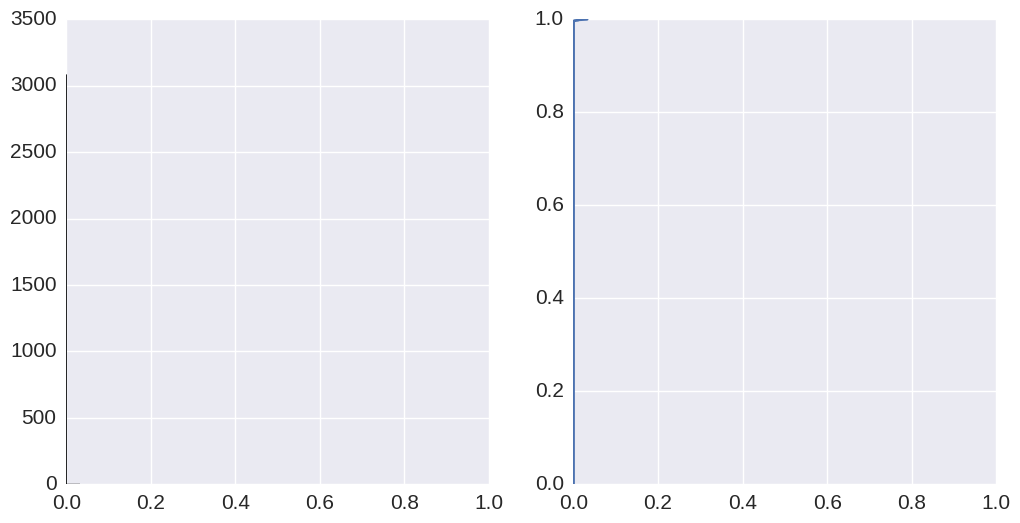

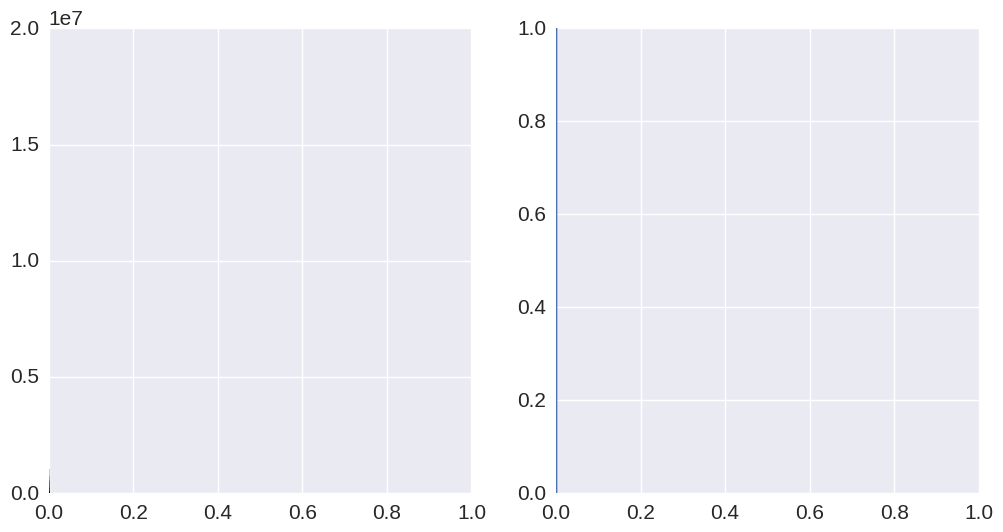

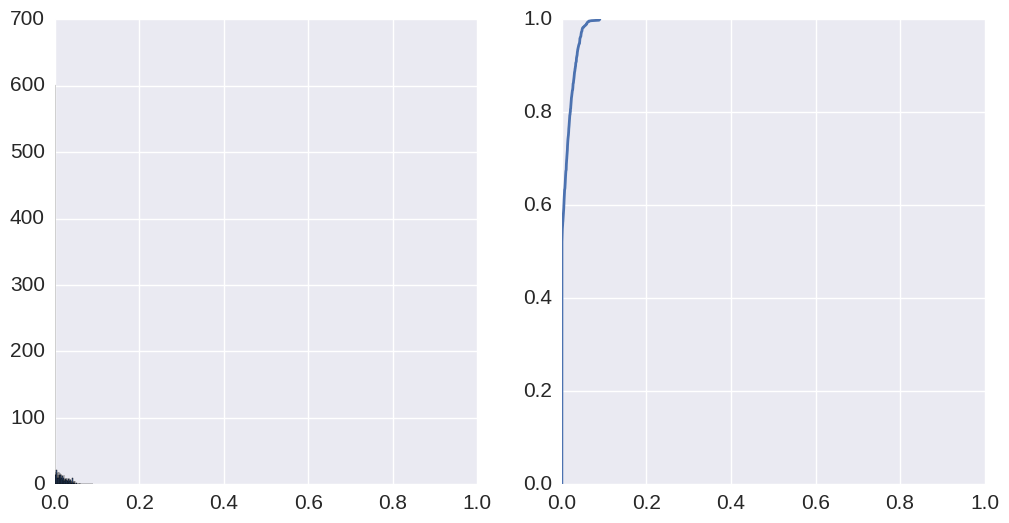

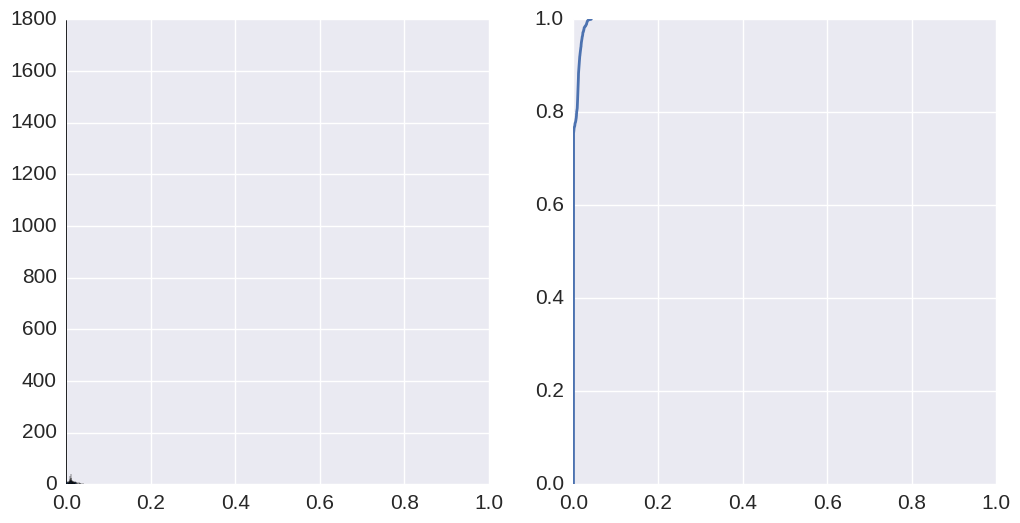

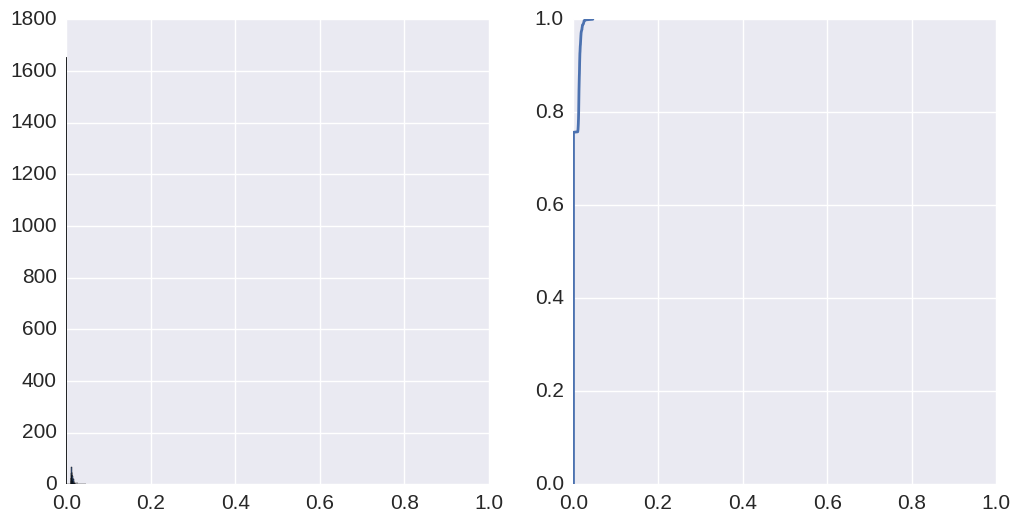

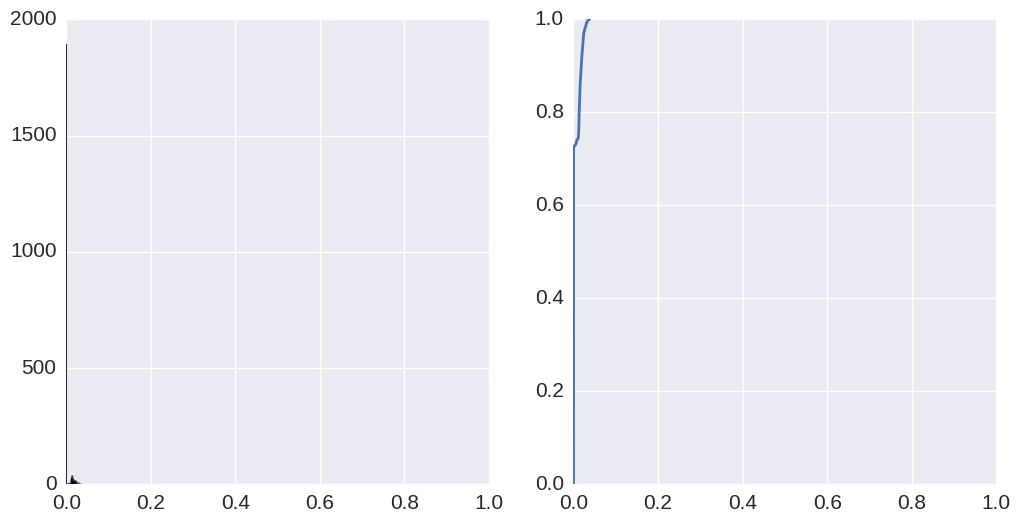

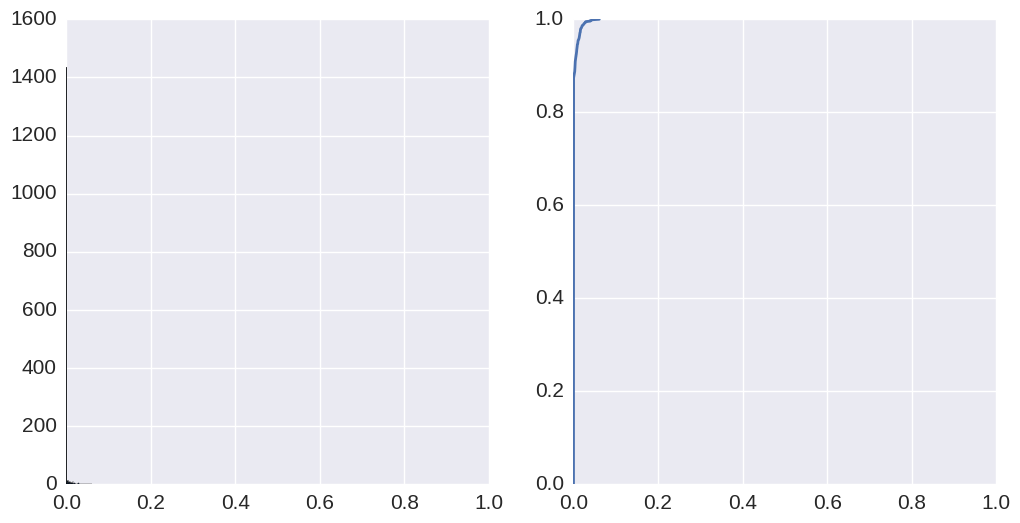

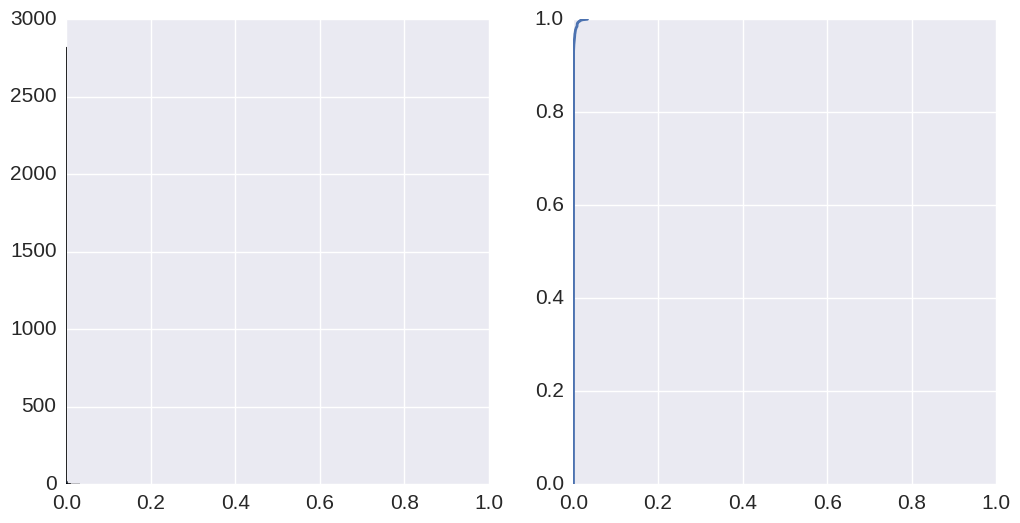

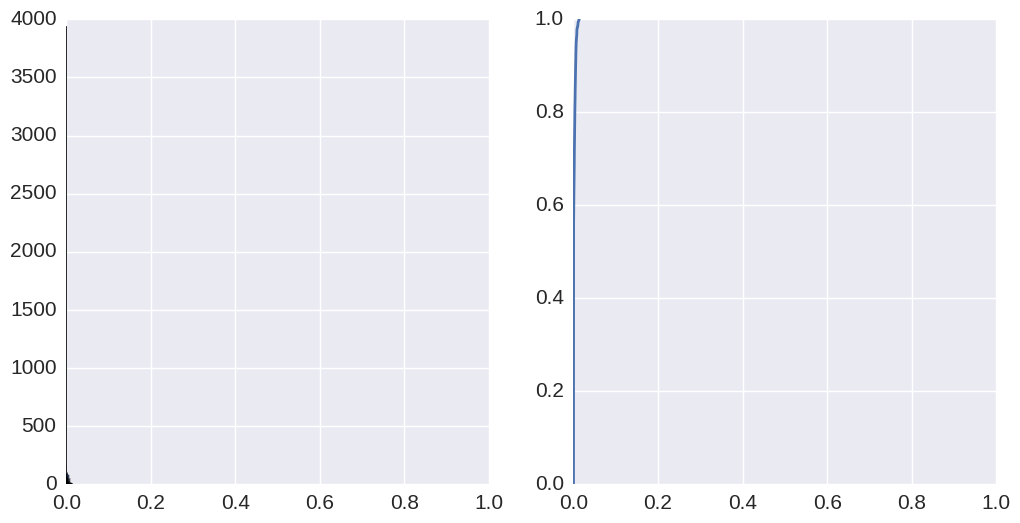

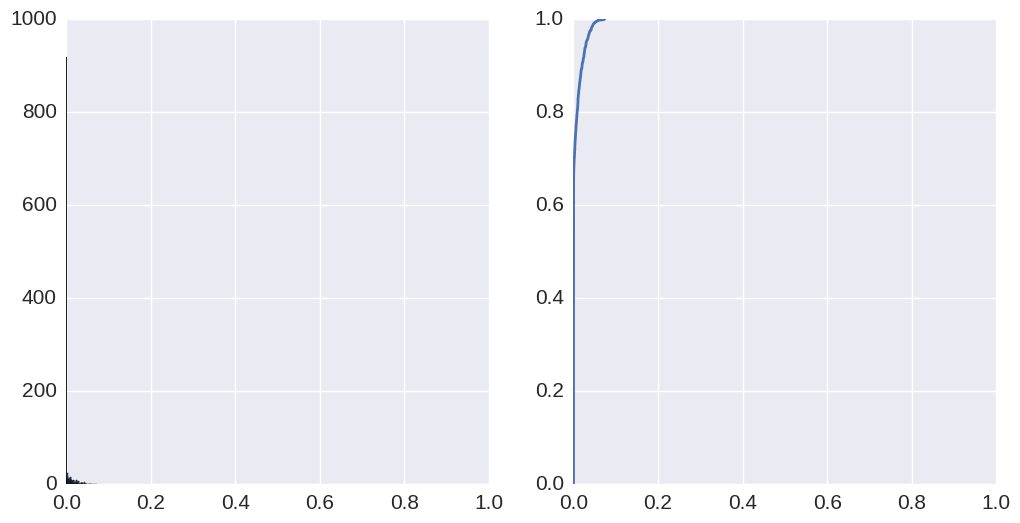

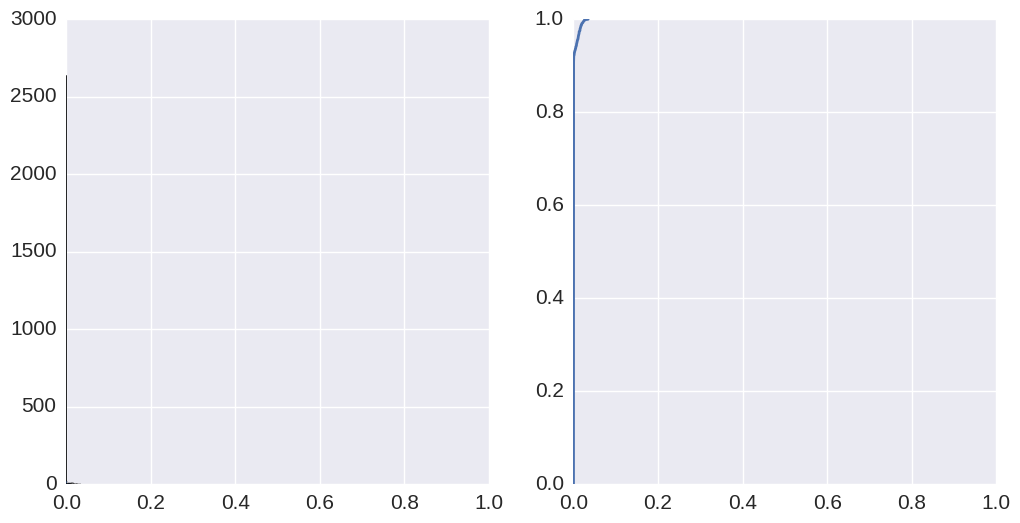

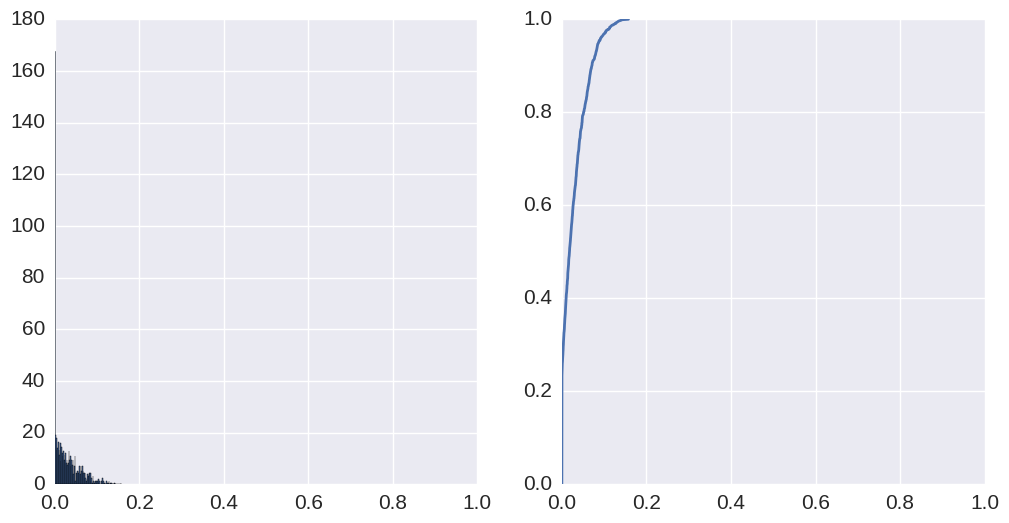

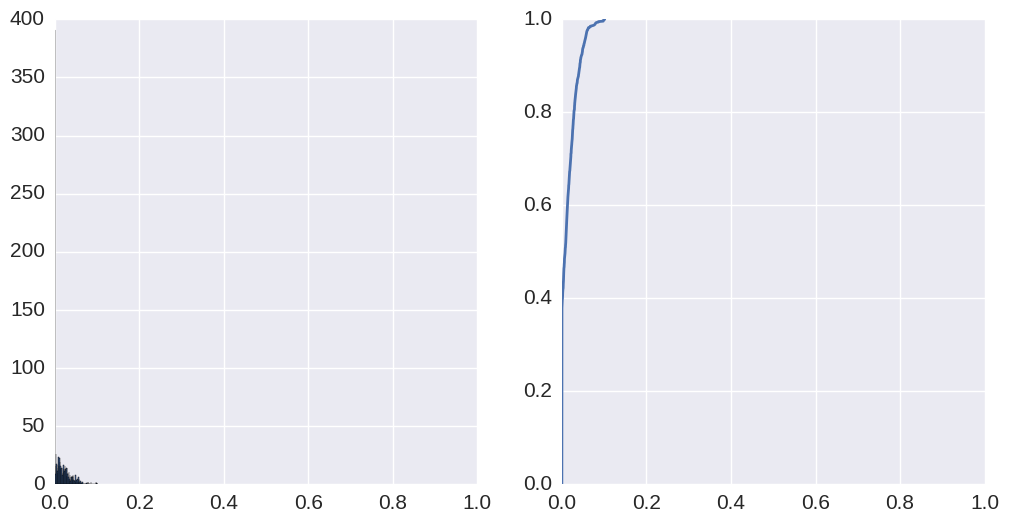

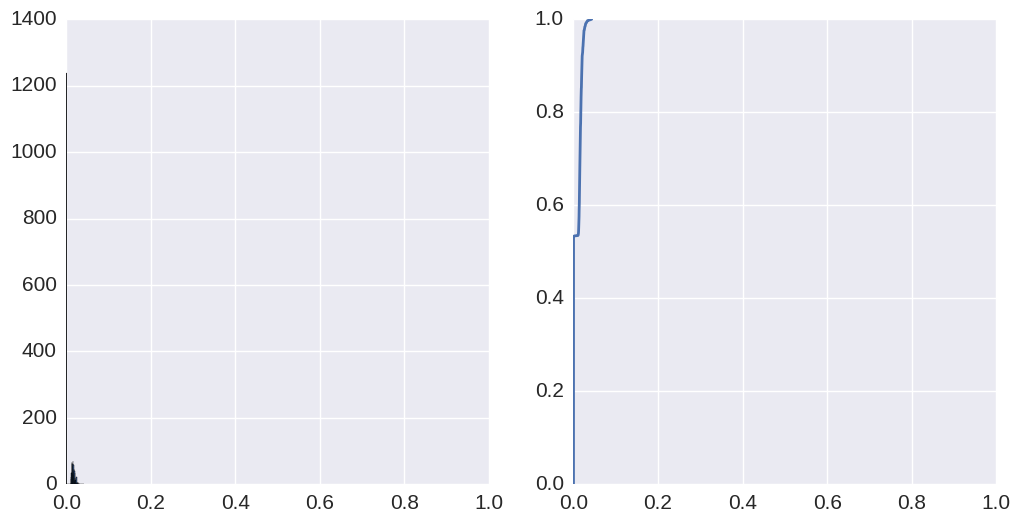

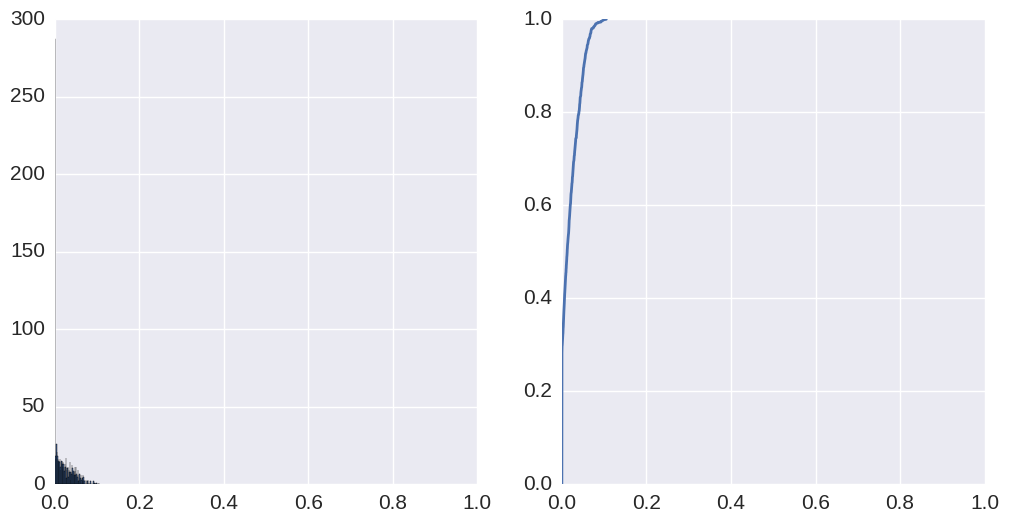

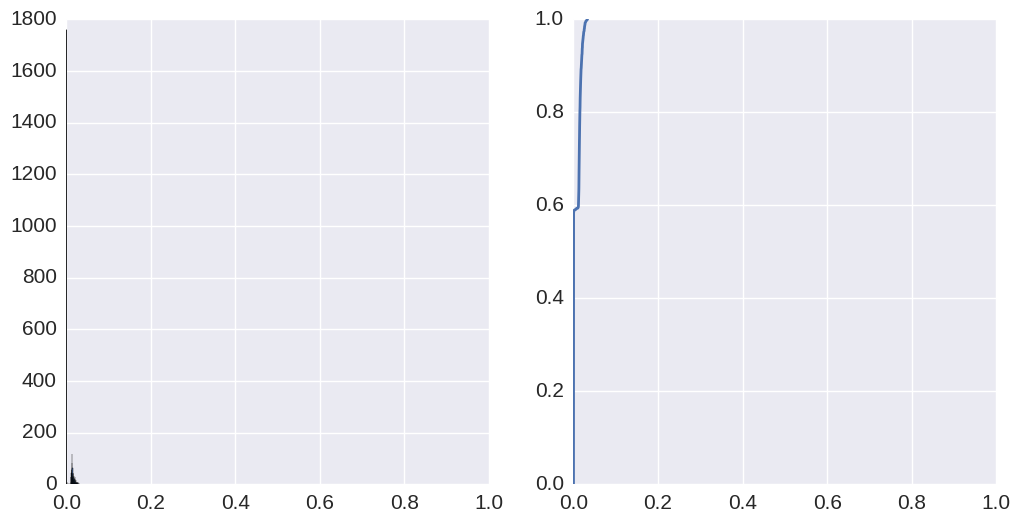

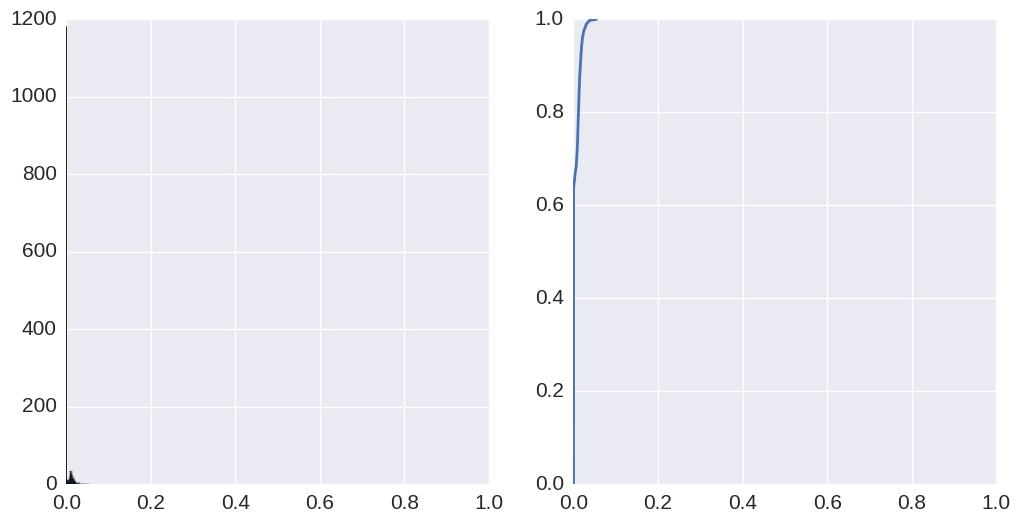

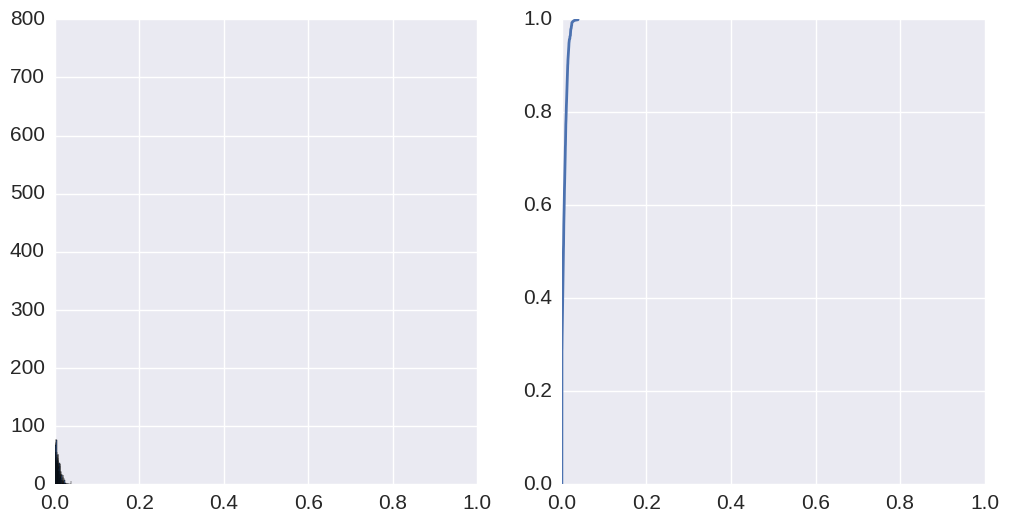

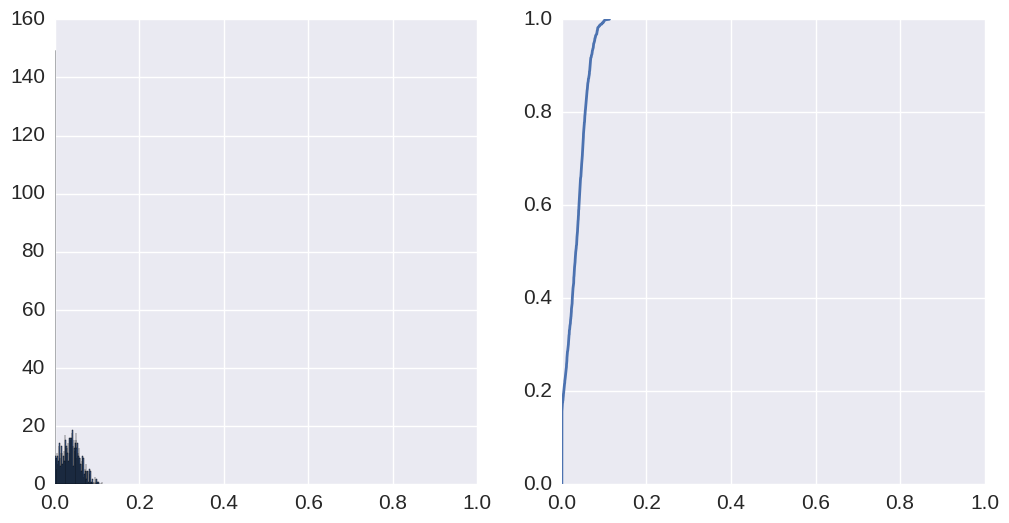

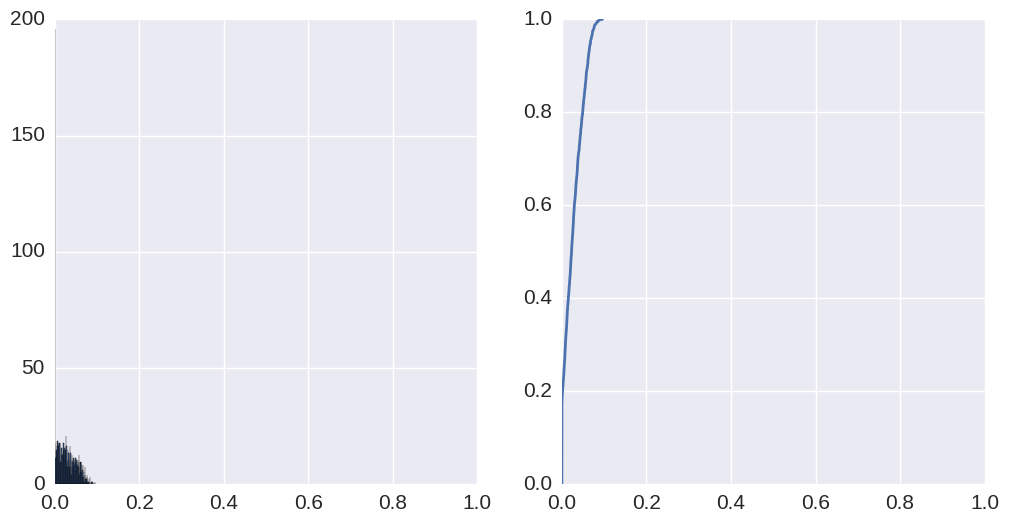

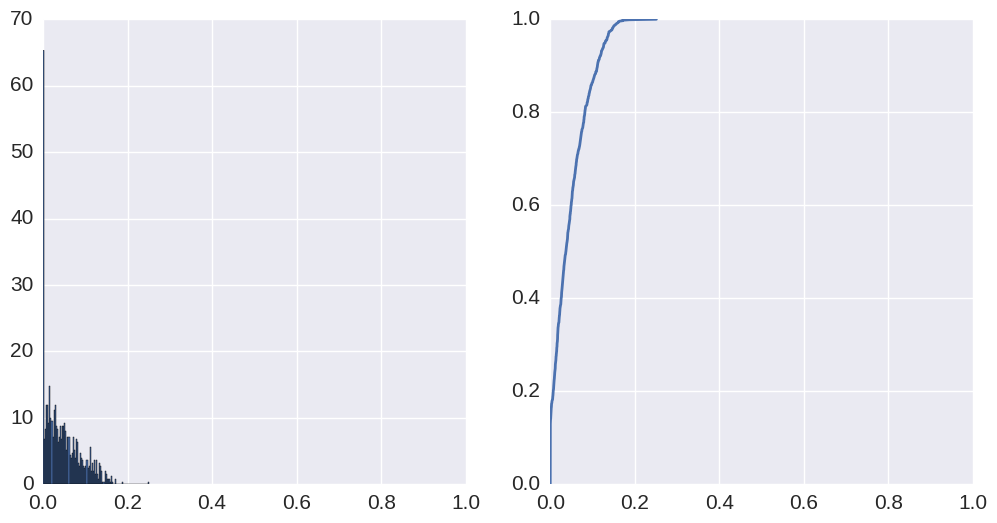

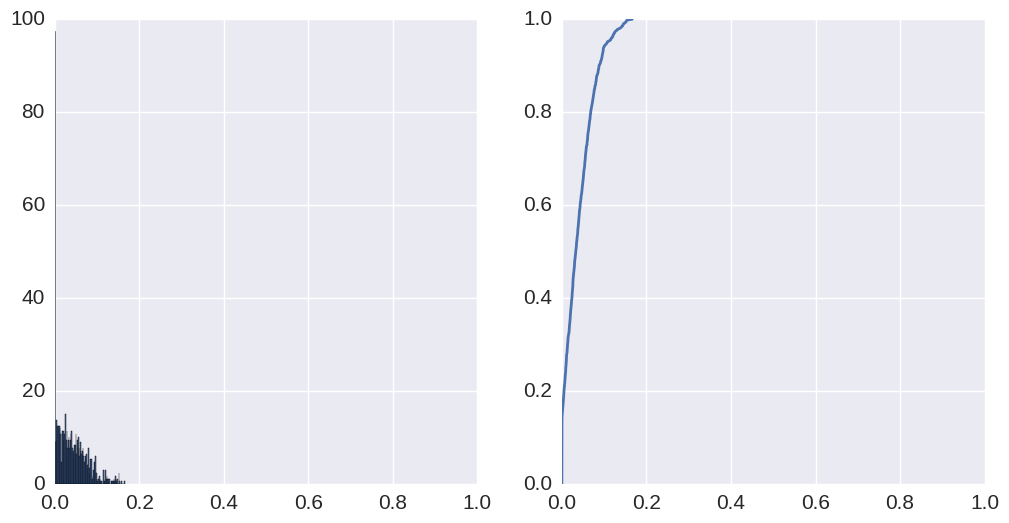

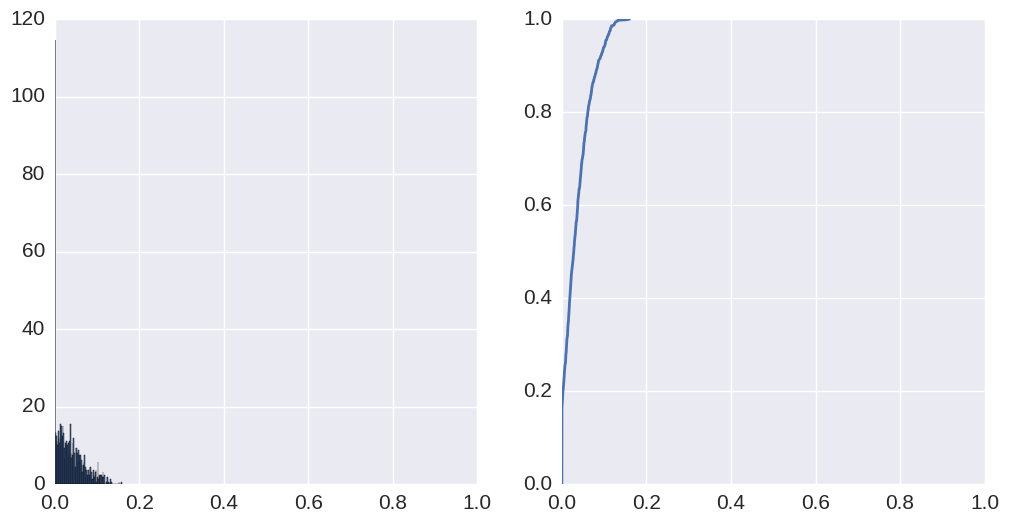

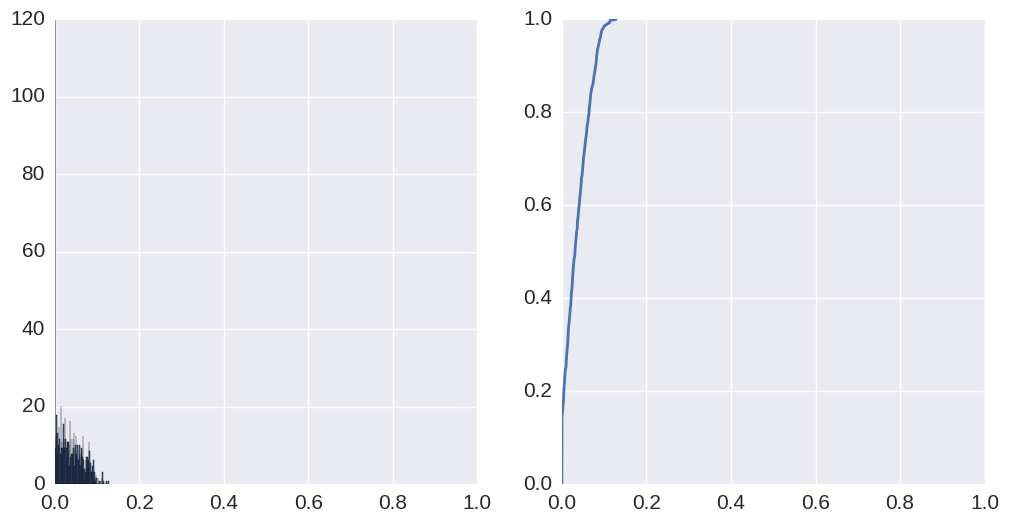

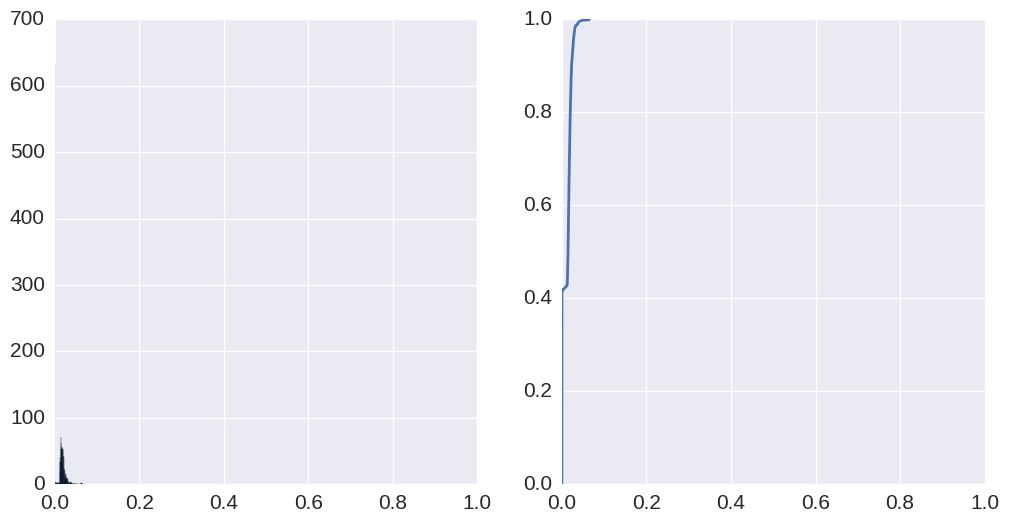

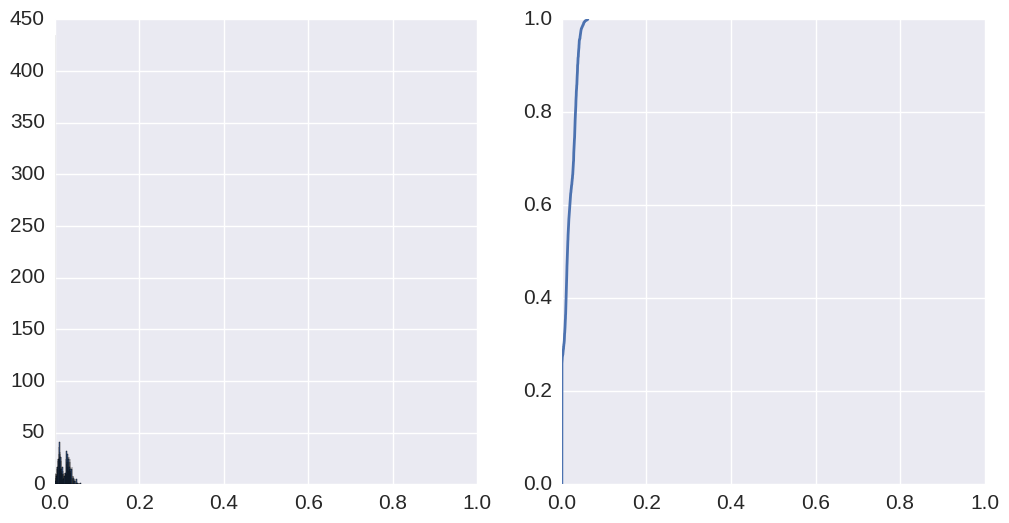

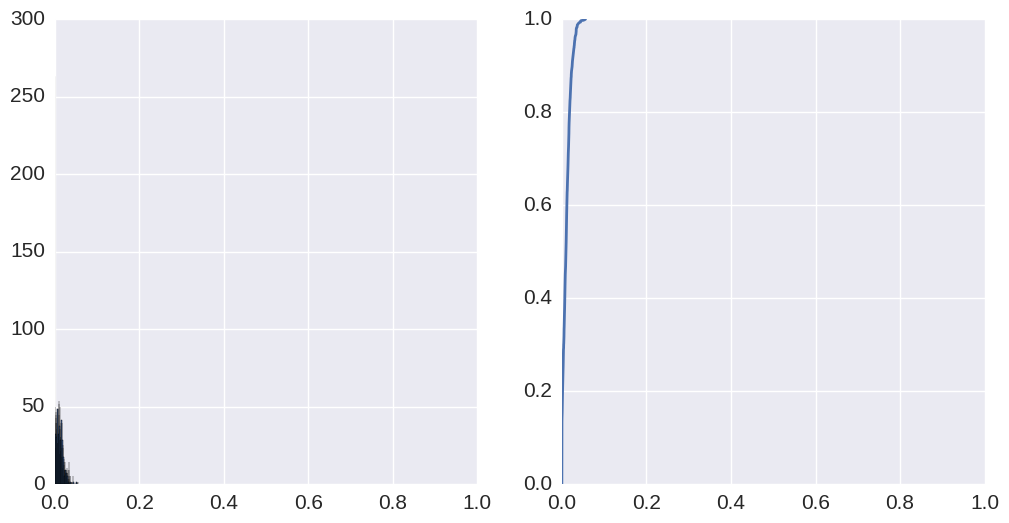

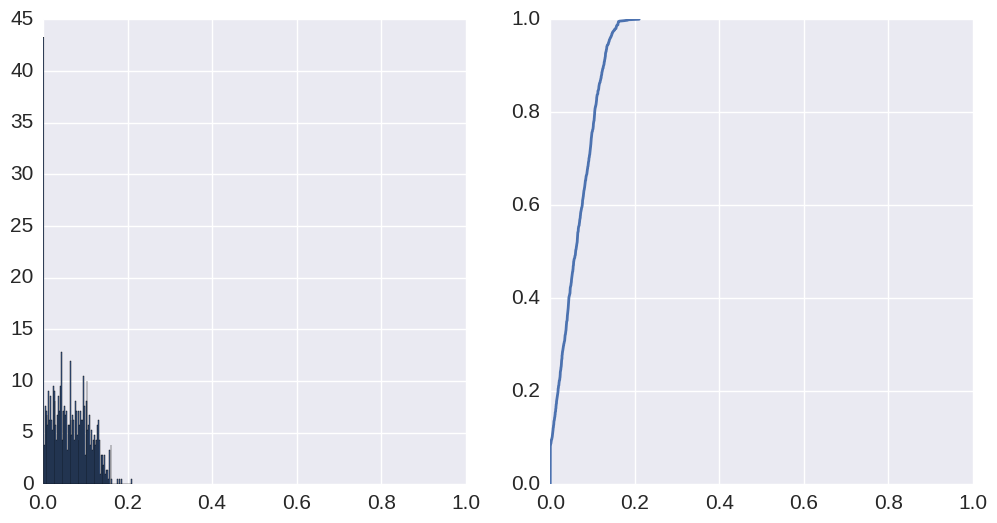

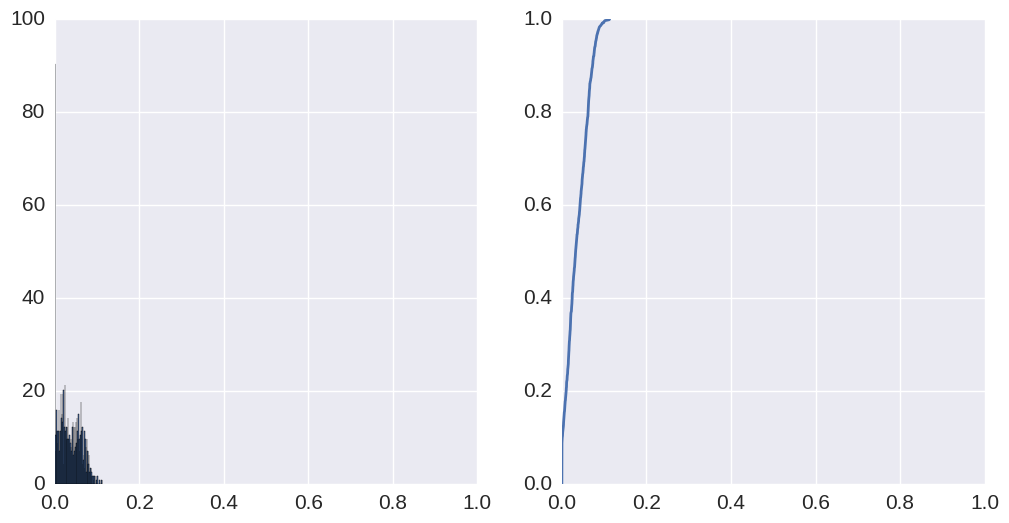

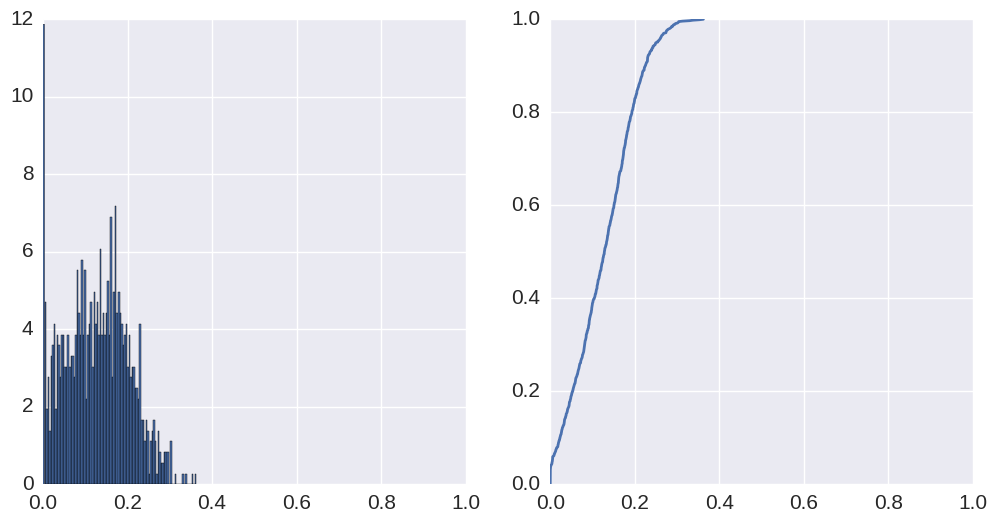

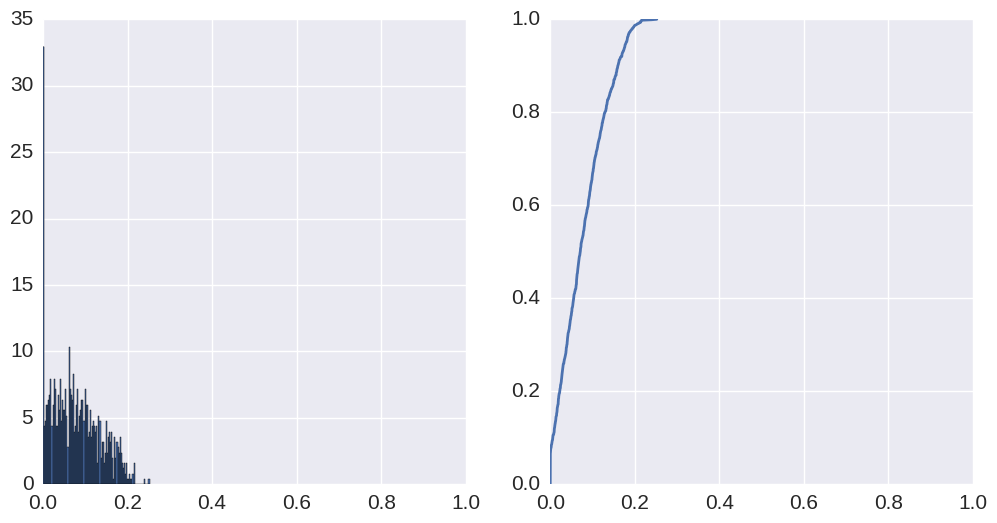

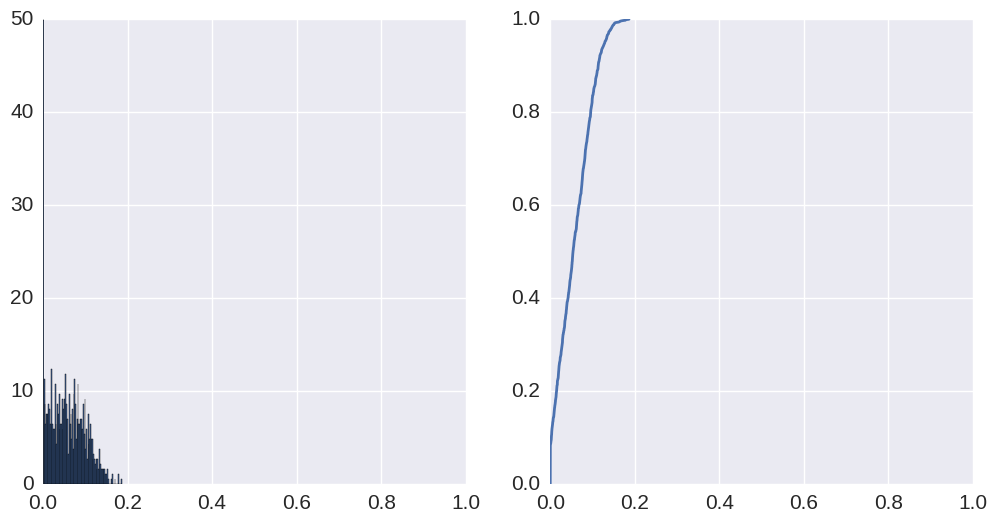

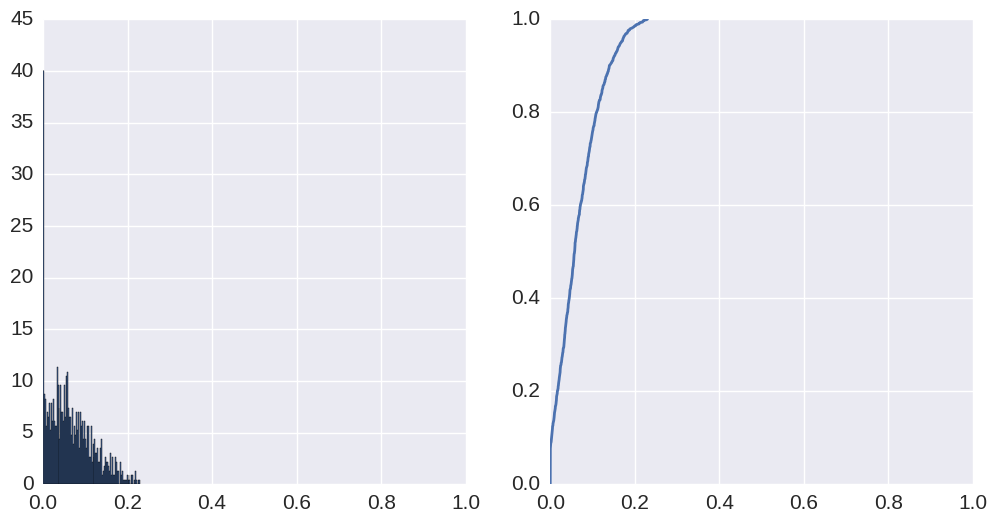

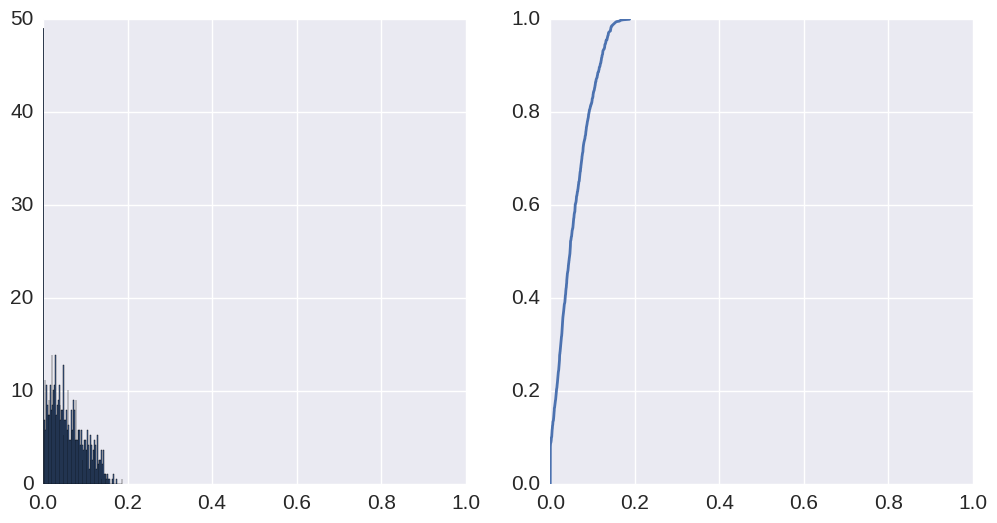

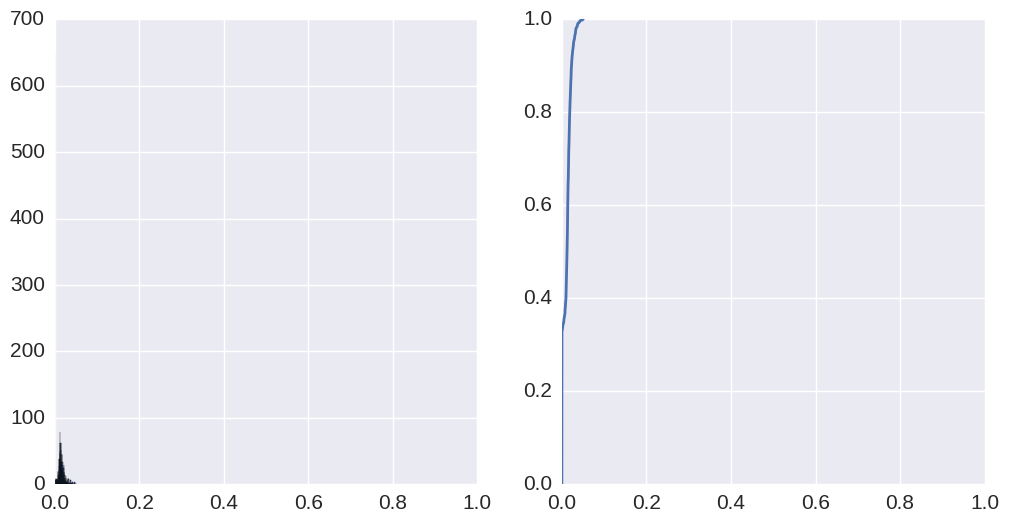

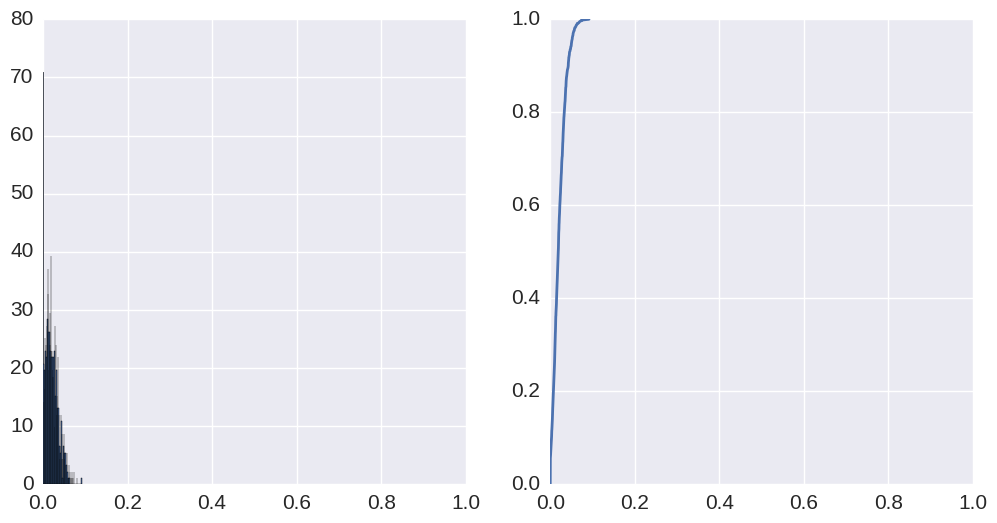

In [17]:
%cd /nfs/data3/lmatthey/visual_working_mem/bootstrap_nontargets
%run reloader_bootstrap_experimental_gorgo11_200717.py

In [18]:
print("P-values, Collapsing across subjects")
print(result_pvalue_bootstrap_nitems)

print("P-values, per subjects")
print(result_pvalue_bootstrap_subject_nitems_samples)

P-values, Collapsing across subjects
[   nan  0.858  0.067  0.003  0.002]
P-values, per subjects
[[   nan    nan    nan    nan    nan    nan    nan    nan]
 [ 0.672  0.358  0.845  0.209  0.304  0.86   0.918  0.072]
 [ 0.938  0.66   0.356  0.015  0.088  0.054  0.939  0.381]
 [ 0.89   0.61   0.877  0.001  0.004  0.127  0.187  0.423]
 [ 0.976  0.797  0.94   0.009  0.143  0.041  0.068  0.503]]


[autoreload of params failed: Traceback (most recent call last):
  File "/nfs/nhome/live/lmatthey/Applications/anaconda/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: No module named params
]


In [19]:
print("num significant subjects, collapsing across subjects")
print(result_pvalue_bootstrap_nitems < 0.01)

print("num significant subjects, per subjects")
print(np.sum(result_pvalue_bootstrap_subject_nitems_samples < 0.05, axis=-1))

num significant subjects, collapsing across subjects
[False False False  True  True]
num significant subjects, per subjects
[0 0 1 2 2]
